# **Quantium: Customer Analytics**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## **Transaction Data**
First, we will analyze the transaction data.

In [3]:
df_trans = pd.read_excel('/Users/khairunnisa/Documents/Datasets/Quantium/QVI_transaction_data.xlsx')

In [4]:
df_trans

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


- DATE: transaction date
- STORE_NBR: store number
- LYLTY_CARD_NBR: loyalty card number
- TXN_ID: transaction id
- PROD_NBR: product number
- PROD_NAME: product name
- PROD_QTY: product quantity
- TOT_SALES: total sales

In [5]:
df_trans.shape

(264836, 8)

In [6]:
df_trans['TXN_ID'].nunique()

263127

In [7]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


From the info above, there are some issues we can address.
- The DATE column is in excel series dates. Thus, we will converted the dates to real date.

In [8]:
df_trans.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

> Check for duplicates

In [9]:
df_trans.duplicated().sum()

1

In [10]:
df_trans[df_trans.duplicated(keep=False)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124843,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [11]:
df_trans = df_trans.drop_duplicates()

In [12]:
df_trans.shape

(264835, 8)

> Summary Table

In [13]:
summary = []

for col in df_trans.columns:
    summary.append([col, df_trans[col].dtype, df_trans[col].nunique(), df_trans[col].isna().sum(), df_trans[col].unique()])

pd.DataFrame(columns=['column name', 'data type', 'unique count', 'missing values', 'unique values'], data=summary)

,column name,data type,unique count,missing values,unique values
0,DATE,int64,364,0,"[43390, 43599, 43605, 43329, 43330, 43604, 436..."
1,STORE_NBR,int64,272,0,"[1, 2, 4, 5, 7, 8, 9, 13, 19, 20, 22, 23, 25, ..."
2,LYLTY_CARD_NBR,int64,72637,0,"[1000, 1307, 1343, 2373, 2426, 4074, 4149, 419..."
3,TXN_ID,int64,263127,0,"[1, 348, 383, 974, 1038, 2982, 3333, 3539, 452..."
4,PROD_NBR,int64,114,0,"[5, 66, 61, 69, 108, 57, 16, 24, 42, 52, 114, ..."
5,PROD_NAME,object,114,0,"[Natural Chip Compny SeaSalt175g, CCs N..."
6,PROD_QTY,int64,6,0,"[2, 3, 5, 1, 4, 200]"
7,TOT_SALES,float64,112,0,"[6.0, 6.3, 2.9, 15.0, 13.8, 5.1, 5.7, 3.6, 3.9..."


### **Cleaning**

> Convert DATE column to a real date

In [14]:
pd.to_datetime('1899-12-30') + pd.to_timedelta(df_trans['DATE'], unit='D')

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264835, dtype: datetime64[ns]

In [15]:
df_trans['DATE'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(df_trans['DATE'], unit='D')

In [16]:
df_trans

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


> Transaction ID

In [17]:
df_trans[df_trans.duplicated(subset='TXN_ID', keep=False)].sort_values('TXN_ID')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69847,2019-06-20,1,1446,517,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2
69846,2019-06-20,1,1446,517,99,Pringles Sthrn FriedChicken 134g,2,7.4
228855,2018-12-20,2,2034,628,95,Sunbites Whlegrn Crisps Frch/Onin 90g,1,1.7
228856,2018-12-20,2,2034,628,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8
135791,2018-08-26,3,3008,1142,15,Twisties Cheese 270g,2,9.2
...,...,...,...,...,...,...,...,...
5463,2018-08-14,271,271219,269517,106,Natural ChipCo Hony Soy Chckn175g,2,6.0
135079,2018-10-03,272,272166,269865,99,Pringles Sthrn FriedChicken 134g,2,7.4
135080,2018-10-03,272,272166,269865,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4
203989,2019-04-28,272,272349,270140,32,Kettle Sea Salt And Vinegar 175g,2,10.8


From here, we can see that the same transaction ID means the customer bought more than one product in one transaction.

> Product Name

In [18]:
df_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


We can see that size pack is included in the product name, we will separate the pack size into a new column.

In [19]:
df_trans['PROD_NAME'].str.extract(r'(\d+)')

,0
0,175
1,175
2,170
3,175
4,150
...,...
264831,175
264832,175
264833,170
264834,150


In [20]:
df_trans['PROD_NAME'].str.extract(r'(\d+)').isna().sum()

0    0
dtype: int64

In [21]:
df_trans.iloc[9]

DATE                                2018-08-18 00:00:00
STORE_NBR                                             7
LYLTY_CARD_NBR                                     7150
TXN_ID                                             6900
PROD_NBR                                             52
PROD_NAME         Grain Waves Sour    Cream&Chives 210G
PROD_QTY                                              2
TOT_SALES                                           7.2
Name: 9, dtype: object

In [22]:
df_trans['PROD_NAME'].str.extract(r'(\d+[gG])')

,0
0,175g
1,175g
2,170g
3,175g
4,150g
...,...
264831,175g
264832,175g
264833,170g
264834,150g


In [23]:
df_trans['PROD_NAME'].str.extract(r'(\d+[gG])').isna().sum()

0    0
dtype: int64

In [24]:
df_trans.insert(6, 'PROD_GR', df_trans['PROD_NAME'].str.extract(r'(\d+)'))

In [25]:
df_trans

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_GR,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,175,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,175,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,170,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,175,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150,3,13.8
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,175,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,175,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,170,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,150,2,7.8


In [26]:
df_trans['PROD_GR'] = df_trans['PROD_GR'].astype(int)

In [27]:
df_trans['PROD_NAME'].str.strip().str.split().str[-1].value_counts()

PROD_NAME
175g                  60560
150g                  41633
134g                  25102
110g                  22387
170g                  18502
165g                  15297
330g                  12540
300g                  12041
380g                   6418
200g                   4473
Salt                   3257
Chicken270g            3170
250g                   3169
210g                   3167
Ht300g                 3125
270g                   3115
210G                   3105
90g                    3008
190g                   2995
160g                   2970
220g                   1564
70g                    1507
150G                   1498
Chs&Onion170g          1481
SeaSalt175g            1468
180g                   1468
Chli&S/Cream175G       1461
Chckn175g              1460
125g                   1454
CutSalt/Vinegr175g     1440
Name: count, dtype: int64

In [28]:
df_trans[df_trans['PROD_NAME'].str.endswith('Salt')]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_GR,PROD_QTY,TOT_SALES
65,2019-05-20,83,83008,82099,63,Kettle 135g Swt Pot Sea Salt,135,2,8.4
153,2019-05-17,208,208139,206906,63,Kettle 135g Swt Pot Sea Salt,135,1,4.2
174,2018-08-20,237,237227,241132,63,Kettle 135g Swt Pot Sea Salt,135,2,8.4
177,2019-05-17,243,243070,246706,63,Kettle 135g Swt Pot Sea Salt,135,1,4.2
348,2018-10-26,7,7077,6604,63,Kettle 135g Swt Pot Sea Salt,135,2,8.4
...,...,...,...,...,...,...,...,...,...
264564,2018-10-08,260,260240,259480,63,Kettle 135g Swt Pot Sea Salt,135,2,8.4
264574,2019-06-12,261,261035,259860,63,Kettle 135g Swt Pot Sea Salt,135,2,8.4
264725,2018-07-20,266,266413,264246,63,Kettle 135g Swt Pot Sea Salt,135,1,4.2
264767,2019-06-08,269,269133,265839,63,Kettle 135g Swt Pot Sea Salt,135,2,8.4


In [29]:
df_trans['PROD_NAME'].str.replace(r'\d+[gG]\b', '', regex=True).str.strip().str.split().str.join(' ')

0                 Natural Chip Compny SeaSalt
1                            CCs Nacho Cheese
2            Smiths Crinkle Cut Chips Chicken
3            Smiths Chip Thinly S/Cream&Onion
4         Kettle Tortilla ChpsHny&Jlpno Chili
                         ...                 
264831     Kettle Sweet Chilli And Sour Cream
264832                Tostitos Splash Of Lime
264833                       Doritos Mexicana
264834     Doritos Corn Chip Mexican Jalapeno
264835                Tostitos Splash Of Lime
Name: PROD_NAME, Length: 264835, dtype: object

In [30]:
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace(r'\d+[gG]\b', '', regex=True).str.strip().str.split().str.join(' ')

In [31]:
df_trans

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_GR,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,175,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,175,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,170,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,175,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,150,3,13.8
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,175,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,175,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,170,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,150,2,7.8


Next, we will extract the brand name into a new column.

In [32]:
df_trans['PROD_NAME'].str.split().apply(lambda x: x[0]).value_counts()

PROD_NAME
Kettle        41288
Smiths        28859
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3185
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64

In [33]:
df_trans[df_trans['PROD_NAME'].str.startswith('Natural')]['PROD_NAME'].value_counts()

PROD_NAME
Natural Chip Co Tmato Hrb&Spce      1572
Natural ChipCo Sea Salt & Vinegr    1550
Natural Chip Compny SeaSalt         1468
Natural ChipCo Hony Soy Chckn       1460
Name: count, dtype: int64

Due to variations in how some brands names are written, despite referring to the same brand, we will standardize them.

In [34]:
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Natural ChipCo', 'Natural Chip Co')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Natural Chip Compny', 'Natural Chip Co')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('NCC', 'Natural Chip Co')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace(r'Smith\b', 'Smiths', regex=True)
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace(r'Dorito\b', 'Doritos', regex=True)
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('RRD', 'Red Rock Deli')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Infzns', 'Infuzions')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('GrnWves', 'Grain Waves')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Snbts', 'Sunbites')

In [35]:
df_trans

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_GR,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Co SeaSalt,175,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,175,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,170,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,175,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,150,3,13.8
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,175,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,175,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,170,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,150,2,7.8


In [36]:
df_trans['PROD_NAME'].str.split().apply(lambda x: x[0]).unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'Cheezels', 'Infuzions',
       'Red', 'Pringles', 'Tyrrells', 'Cobs', 'Woolworths', 'French',
       'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [37]:
brand_list = ['Natural Chip Co', 'CCs', 'Smiths', 'Kettle', 'Old El Paso',
              'Grain Waves', 'Doritos', 'Twisties', 'WW', 'Thins',
              'Burger Rings', 'Cheezels', 'Infuzions', 'Red Rock Deli', 'Pringles',
              'Tyrrells', 'Cobs', 'Woolworths', 'French Fries', 'Tostitos', 'Cheetos', 'Sunbites']

def extract_brand(name):
    for brand in brand_list:
        if brand in name:
            return brand
    return None

df_trans['PROD_NAME'].apply(extract_brand)

0         Natural Chip Co
1                     CCs
2                  Smiths
3                  Smiths
4                  Kettle
               ...       
264831             Kettle
264832           Tostitos
264833            Doritos
264834            Doritos
264835           Tostitos
Name: PROD_NAME, Length: 264835, dtype: object

In [38]:
df_trans.insert(5, 'PROD_BRAND', df_trans['PROD_NAME'].apply(extract_brand))

In [39]:
df_trans

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_BRAND,PROD_NAME,PROD_GR,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Co,Natural Chip Co SeaSalt,175,2,6.0
1,2019-05-14,1,1307,348,66,CCs,CCs Nacho Cheese,175,3,6.3
2,2019-05-20,1,1343,383,61,Smiths,Smiths Crinkle Cut Chips Chicken,170,2,2.9
3,2018-08-17,2,2373,974,69,Smiths,Smiths Chip Thinly S/Cream&Onion,175,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle,Kettle Tortilla ChpsHny&Jlpno Chili,150,3,13.8
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle,Kettle Sweet Chilli And Sour Cream,175,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos,Tostitos Splash Of Lime,175,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos,Doritos Mexicana,170,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos,Doritos Corn Chip Mexican Jalapeno,150,2,7.8


We will verify if all the products are categorized as chips and also standardize the product name.

In [40]:
def word_freq(text):
    df_text = text.str.extractall(r'(\w+)')
    df_text = df_text.reset_index()

    df_unique = df_text[0].value_counts()
    df_unique = df_unique.to_frame().reset_index().rename(columns={0:'word', 'count':'freq'})
    return df_unique

In [41]:
word_freq(df_trans['PROD_NAME'])

,word,freq
0,Chips,49770
1,Kettle,41288
2,Smiths,31822
3,Doritos,28147
4,Salt,27976
...,...,...
184,Frch,1432
185,Whlegrn,1432
186,Pc,1431
187,Garden,1419


In [42]:
word_freq(df_trans['PROD_NAME'])['word'].unique()

array(['Chips', 'Kettle', 'Smiths', 'Doritos', 'Salt', 'Cheese',
       'Pringles', 'Crinkle', 'Chip', 'Corn', 'Original', 'Cut',
       'Chicken', 'Salsa', 'Deli', 'Rock', 'Red', 'Cream', 'Chilli',
       'Infuzions', 'Sea', 'Thins', 'Sour', 'Crisps', 'Vinegar', 'Sweet',
       'Supreme', 'Chives', 'WW', 'Popd', 'Cobs', 'Tortilla', 'Tostitos',
       'Twisties', 'BBQ', 'Sensations', 'Lime', 'Paso', 'El', 'Old',
       'Dip', 'Swt', 'Waves', 'Grain', 'Tomato', 'Thinly', 'Natural',
       'Co', 'Tyrrells', 'And', 'Tangy', 'SourCream', 'Salted', 'Lightly',
       'Soy', 'Onion', 'Mild', 'Thai', 'Burger', 'Honey', 'Nacho',
       'Potato', 'Cheezels', 'Garlic', 'CCs', 'Woolworths', 'Pesto',
       'Basil', 'Mozzarella', 'ChpsHny', 'Chili', 'Jlpno', 'Chlli', 'Sr',
       'Ched', 'Pot', 'Splash', 'Of', 'SweetChili', 'PotatoMix', 'Crnkle',
       'Orgnl', 'Bag', 'Big', 'Hot', 'Spicy', 'Fig', 'Camembert',
       'Barbeque', 'Mexican', 'Jalapeno', 'Light', 'Chp', 'Spcy', 'Rib',
       'Prawn',

NOT chips:

Old El Paso Salsa Dip Chnky Tom Ht, Old El Paso Salsa Dip Tomato Med, Old El Paso Salsa Dip Tomato Mild, Woolworths Mild Salsa, Doritos Salsa Mild, Doritos Salsa Medium, Woolworths Medium Salsa, Tostitos Splash Of Lime

In [43]:
notchips = [
    'Old El Paso Salsa Dip Chnky Tom Ht',
    'Old El Paso Salsa Dip Tomato Med',
    'Old El Paso Salsa Dip Tomato Mild',
    'Woolworths Mild Salsa',
    'Woolworths Medium Salsa',
    'Doritos Salsa Mild',
    'Doritos Salsa Medium',
    'Tostitos Splash Of Lime'
]

In [44]:
df_trans = df_trans[~(df_trans['PROD_NAME'].isin(notchips))]

In [45]:
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('And', '&')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Swt Pot', 'Sweet Potato')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('SourCream', 'Sour Cream')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('SourCream&Herbs Veg Strws', 'Sour Cream & Herb Veggies Straws')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('ChpsHny&Jlpno Chili', 'Chips Honey & Jalapeno Chilli')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('SweetChili PotatoMix', 'Sweet Chilli Potato Mix')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Swt/Chlli &Sr/Cream', 'Sweet Chilli & Sour Cream')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace(r'Ched\b', 'Cheddar', regex=True)
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Whlgrn Crisps Cheddr&Mstrd', 'Wholegrain Crisps Cheddar & Mustard')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Swt Chli&S/Cream', 'Sweet Chilli & Sour Cream')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Crnkle Chip Orgnl', 'Crinkle Chip Original')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Corn Chp', 'Corn Chip')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('ChpsBtroot&Ricotta', 'Chips Beetroot & Ricotta')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('ChpsFeta&Garlic', 'Chips Feta & Garlic')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Sweet&Spcy', 'Sweet & Spicy')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Crm &Chives', 'Cream & Chives')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Crn Crnchers Tangy Gcamole', 'Corn Crunchers Tangy Guacamole')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Slt Vingar', 'Salt Vinegar')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Sthrn FriedChicken', 'Southern Fried Chicken')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('BBQ&Maple', 'BBQ & Maple')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('& Vinegr', '& Vinegar')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('CutSalt/Vinegr', 'Cut Salt & Vinegar')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Slow Rst', 'Slow Roast')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Salsa & Mzzrlla', 'Salsa & Mozzarella')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Chs&Onion', 'Cheese & Onion')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace(r'Chs\b', 'Cheese', regex=True)
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Tmato Hrb&Spce', 'Tomato Herb & Spice')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Chutny Papadums', 'Chutney Papadams')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Snag&Sauce', 'Snag & Sauce')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace(r'Sp\b', 'SR', regex=True)
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('&OnionStacked', '& Onion Stacked')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace(r'Btroot\b', 'Beetroot', regex=True)
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('SeaSalt', 'Sea Salt')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Hony Soy Chckn', 'Honey Soy Chicken')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Originl saltd', 'Original Salted')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('OnionDip', 'Onion Dip')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Chikn&Garlic Aioli', 'Chicken & Garlic Aioli')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Whlegrn Crisps Frch/Onin', 'Wholegrain Crisps French Onion')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Red Rock Deli Pc Sea Salt', 'Red Rock Deli Sea Salt')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Seasonedchicken', 'Chicken')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Barbeque', 'BBQ')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Light&', 'Light &')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Cream&Herbs Veg Strws', 'Cream & Herb Veggies Straws')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Cream&Chives', 'Cream & Chives')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('Chilli&', 'Chilli &')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('&Lime', '& Lime')
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].str.replace('S/Cream&Onion', 'Sour Cream & Union')

In [46]:
word_freq(df_trans['PROD_NAME'])

,word,freq
0,Chips,59350
1,Kettle,41288
2,Salt,33979
3,Smiths,31822
4,Cheese,30850
...,...,...
129,Puffs,1448
130,Dip,1438
131,Aioli,1434
132,Garden,1419


In [47]:
word_freq(df_trans['PROD_NAME'])['word'].unique()

array(['Chips', 'Kettle', 'Salt', 'Smiths', 'Cheese', 'Chicken',
       'Crinkle', 'Chilli', 'Sour', 'Cream', 'Chip', 'Original',
       'Doritos', 'Corn', 'Pringles', 'Sweet', 'Cut', 'Vinegar', 'Rock',
       'Deli', 'Red', 'Sea', 'Infuzions', 'Thins', 'BBQ', 'Crisps',
       'Potato', 'Supreme', 'Chives', 'WW', 'Popd', 'Cobs', 'Tortilla',
       'Twisties', 'Sensations', 'Honey', 'Onion', 'Waves', 'Grain',
       'Salted', 'Thinly', 'Natural', 'Co', 'Jalapeno', 'Tyrrells',
       'Spicy', 'Tangy', 'Southern', 'Lightly', 'Tostitos', 'Soy', 'Lime',
       'Cheddar', 'Mozzarella', 'Thai', 'Burger', 'Herb', 'Nacho',
       'Beetroot', 'Cheezels', 'Garlic', 'CCs', 'SR', 'French', 'Pesto',
       'Basil', 'Mix', 'Big', 'Bag', 'Hot', 'Camembert', 'Fig', 'Mexican',
       'Light', 'Rib', 'Prawn', 'Crackers', 'Ricotta', 'Chipotle',
       'Smoked', 'Crunchers', 'Guacamole', 'Feta', 'Straws', 'Veggies',
       'Siracha', 'Mexicana', 'Flavour', 'Mystery', 'Crips', 'Fried',
       'Maple', 'Ring

## **Purchase Behaviour**

In [48]:
df_pb = pd.read_csv('/Users/khairunnisa/Documents/Datasets/Quantium/QVI_purchase_behaviour.csv')

In [49]:
df_pb

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


**LIFESTAGE**: customer attribute that identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school.

**PREMIUM_CUSTOMER**: customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options.

In [50]:
df_pb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [51]:
df_pb.shape

(72637, 3)

In [52]:
df_pb.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [53]:
df_pb.duplicated().sum()

0

In [54]:
summary = []

for col in df_pb.columns:
    summary.append([col, df_pb[col].dtype, df_pb[col].nunique(), df_pb[col].isna().sum(), df_pb[col].unique()])

pd.DataFrame(columns=['column name', 'data type', 'unique count', 'missing values', 'unique values'], data=summary)

,column name,data type,unique count,missing values,unique values
0,LYLTY_CARD_NBR,int64,72637,0,"[1000, 1002, 1003, 1004, 1005, 1007, 1009, 101..."
1,LIFESTAGE,object,7,0,"[YOUNG SINGLES/COUPLES, YOUNG FAMILIES, OLDER ..."
2,PREMIUM_CUSTOMER,object,3,0,"[Premium, Mainstream, Budget]"


In [55]:
df_pb['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

We found no abnormalities in the purchase behaviour dataset.

In [56]:
df_pb

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [57]:
df_trans

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_BRAND,PROD_NAME,PROD_GR,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Co,Natural Chip Co Sea Salt,175,2,6.0
1,2019-05-14,1,1307,348,66,CCs,CCs Nacho Cheese,175,3,6.3
2,2019-05-20,1,1343,383,61,Smiths,Smiths Crinkle Cut Chips Chicken,170,2,2.9
3,2018-08-17,2,2373,974,69,Smiths,Smiths Chip Thinly Sour Cream & Union,175,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle,Kettle Tortilla Chips Honey & Jalapeno Chilli,150,3,13.8
...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-16,272,272236,269976,49,Infuzions,Infuzions Sour Cream & Herb Veggies Straws,110,2,7.6
264830,2018-11-12,272,272319,270087,44,Thins,Thins Chips Light & Tangy,175,2,6.6
264831,2019-03-09,272,272319,270088,89,Kettle,Kettle Sweet Chilli & Sour Cream,175,2,10.8
264833,2018-11-06,272,272379,270187,51,Doritos,Doritos Mexicana,170,2,8.8


In [58]:
df_trans.merge(df_pb, how='left', on='LYLTY_CARD_NBR')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_BRAND,PROD_NAME,PROD_GR,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Co,Natural Chip Co Sea Salt,175,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs,CCs Nacho Cheese,175,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths,Smiths Crinkle Cut Chips Chicken,170,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths,Smiths Chip Thinly Sour Cream & Union,175,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle,Kettle Tortilla Chips Honey & Jalapeno Chilli,150,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246412,2019-03-16,272,272236,269976,49,Infuzions,Infuzions Sour Cream & Herb Veggies Straws,110,2,7.6,YOUNG SINGLES/COUPLES,Premium
246413,2018-11-12,272,272319,270087,44,Thins,Thins Chips Light & Tangy,175,2,6.6,YOUNG SINGLES/COUPLES,Premium
246414,2019-03-09,272,272319,270088,89,Kettle,Kettle Sweet Chilli & Sour Cream,175,2,10.8,YOUNG SINGLES/COUPLES,Premium
246415,2018-11-06,272,272379,270187,51,Doritos,Doritos Mexicana,170,2,8.8,YOUNG SINGLES/COUPLES,Premium


Since all necessary cleaning is done, we will now proceed to merge the two datasets.

In [59]:
df = df_trans.merge(df_pb, how='left', on='LYLTY_CARD_NBR')

## **EDA and Cleaning**

In [60]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_BRAND,PROD_NAME,PROD_GR,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Co,Natural Chip Co Sea Salt,175,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs,CCs Nacho Cheese,175,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths,Smiths Crinkle Cut Chips Chicken,170,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths,Smiths Chip Thinly Sour Cream & Union,175,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle,Kettle Tortilla Chips Honey & Jalapeno Chilli,150,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246417 entries, 0 to 246416
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246417 non-null  datetime64[ns]
 1   STORE_NBR         246417 non-null  int64         
 2   LYLTY_CARD_NBR    246417 non-null  int64         
 3   TXN_ID            246417 non-null  int64         
 4   PROD_NBR          246417 non-null  int64         
 5   PROD_BRAND        246417 non-null  object        
 6   PROD_NAME         246417 non-null  object        
 7   PROD_GR           246417 non-null  int64         
 8   PROD_QTY          246417 non-null  int64         
 9   TOT_SALES         246417 non-null  float64       
 10  LIFESTAGE         246417 non-null  object        
 11  PREMIUM_CUSTOMER  246417 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 22.6+ MB


In [62]:
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_GR,PROD_QTY,TOT_SALES
count,246417,246417.000000,2.464170e+05,2.464170e+05,246417.000000,246417.000000,246417.000000,246417.000000
mean,2018-12-30 03:00:26.954309120,135.031861,1.355116e+05,1.351107e+05,56.060670,175.288892,1.907640,7.278917
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,70.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.757100e+04,26.000000,150.000000,2.000000,5.700000
50%,2018-12-30 00:00:00,130.000000,1.303540e+05,1.351230e+05,52.000000,170.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030740e+05,2.026060e+05,87.000000,175.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,380.000000,200.000000,650.000000
std,NaN,76.770984,8.070506e+04,7.813009e+04,33.687177,59.538489,0.660382,3.084767


In [63]:
summary = []

for col in df.columns:
    summary.append([col, df[col].dtype, df[col].nunique(), df[col].isna().sum(), df[col].unique()])

pd.DataFrame(columns=['column name', 'data type', 'unique count', 'missing values', 'unique values'], data=summary)

,column name,data type,unique count,missing values,unique values
0,DATE,datetime64[ns],364,0,"[2018-10-17 00:00:00, 2019-05-14 00:00:00, 201..."
1,STORE_NBR,int64,271,0,"[1, 2, 4, 5, 7, 8, 9, 13, 19, 20, 22, 23, 25, ..."
2,LYLTY_CARD_NBR,int64,71252,0,"[1000, 1307, 1343, 2373, 2426, 4149, 4196, 502..."
3,TXN_ID,int64,244941,0,"[1, 348, 383, 974, 1038, 3333, 3539, 4525, 690..."
4,PROD_NBR,int64,106,0,"[5, 66, 61, 69, 108, 16, 24, 42, 52, 114, 15, ..."
5,PROD_BRAND,object,21,0,"[Natural Chip Co, CCs, Smiths, Kettle, Grain W..."
6,PROD_NAME,object,106,0,"[Natural Chip Co Sea Salt, CCs Nacho Cheese, S..."
7,PROD_GR,int64,20,0,"[175, 170, 150, 330, 210, 270, 220, 125, 110, ..."
8,PROD_QTY,int64,6,0,"[2, 3, 5, 1, 4, 200]"
9,TOT_SALES,float64,105,0,"[6.0, 6.3, 2.9, 15.0, 13.8, 5.7, 3.6, 3.9, 7.2..."


In [64]:
display(df['DATE'].min(), df['DATE'].max())

Timestamp('2018-07-01 00:00:00')

Timestamp('2019-06-30 00:00:00')

The transaction data covers a one year period, from the beginning of the second half of 2018 to the end of the first half of 2019.

In [65]:
pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')

DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
               '2018-07-09', '2018-07-10',
               ...
               '2019-06-21', '2019-06-22', '2019-06-23', '2019-06-24',
               '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28',
               '2019-06-29', '2019-06-30'],
              dtype='datetime64[ns]', length=365, freq='D')

In [66]:
pd.date_range(start=df['DATE'].min(), end=df['DATE'].max(), freq='D').difference(df['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')

There were no transactions on December, 25th 2018 as the stores were closed for Christmas day.

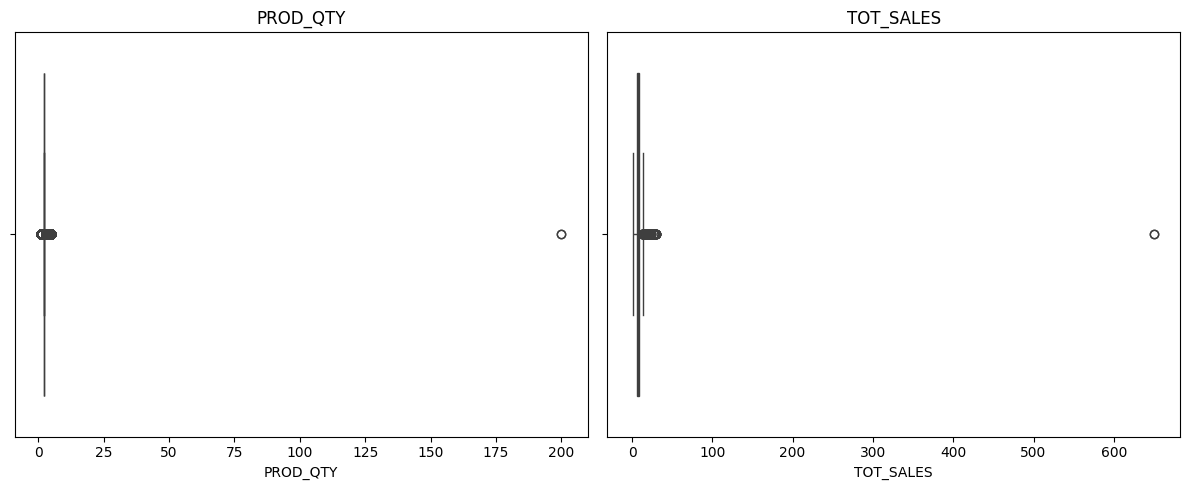

In [67]:
plt.figure(figsize=(12, 5))

col_num = ['PROD_QTY', 'TOT_SALES']

for i, col in enumerate(col_num):
    plt.subplot(1, 2, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()

In [68]:
df[df['PROD_QTY'] > 100]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_BRAND,PROD_NAME,PROD_GR,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
64990,2018-08-19,226,226000,226201,4,Doritos,Doritos Corn Chip Supreme,380,200,650.0,OLDER FAMILIES,Premium
64991,2019-05-20,226,226000,226210,4,Doritos,Doritos Corn Chip Supreme,380,200,650.0,OLDER FAMILIES,Premium


In [69]:
df[df['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_BRAND,PROD_NAME,PROD_GR,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
64990,2018-08-19,226,226000,226201,4,Doritos,Doritos Corn Chip Supreme,380,200,650.0,OLDER FAMILIES,Premium
64991,2019-05-20,226,226000,226210,4,Doritos,Doritos Corn Chip Supreme,380,200,650.0,OLDER FAMILIES,Premium


There is an outlier in the purchase quantity. Since it involves only one individual who has no significant transactions aside from this outlier and who may be purchasing for commercial use, this customer will be excluded from the analysis.

In [70]:
df = df[~(df['LYLTY_CARD_NBR'] == 226000)].reset_index().drop(columns=['index'])

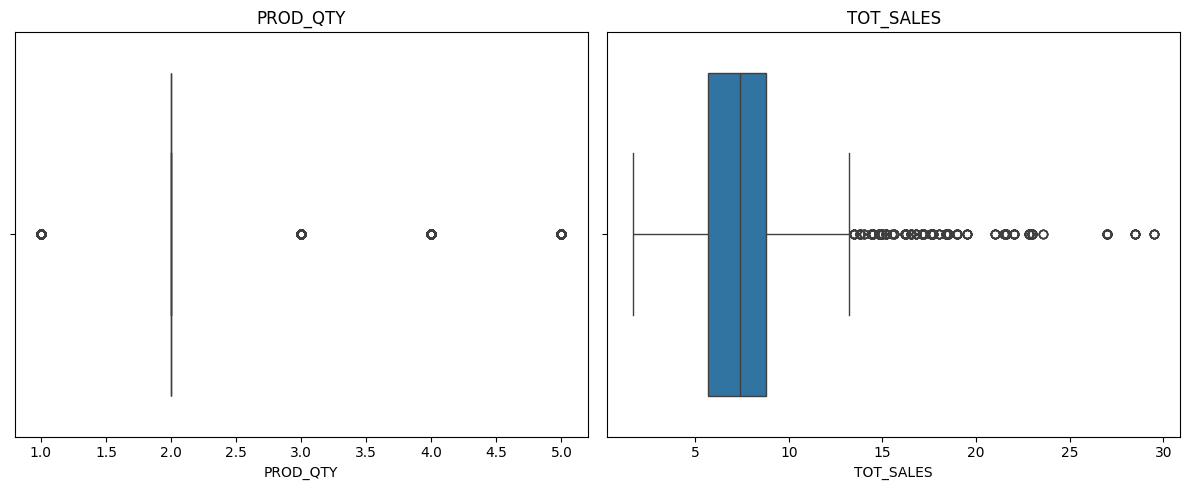

In [71]:
plt.figure(figsize=(12, 5))

col_num = ['PROD_QTY', 'TOT_SALES']

for i, col in enumerate(col_num):
    plt.subplot(1, 2, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()

## **Analysis**

In [72]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_BRAND,PROD_NAME,PROD_GR,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Co,Natural Chip Co Sea Salt,175,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs,CCs Nacho Cheese,175,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths,Smiths Crinkle Cut Chips Chicken,170,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths,Smiths Chip Thinly Sour Cream & Union,175,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle,Kettle Tortilla Chips Honey & Jalapeno Chilli,150,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [73]:
df.insert(8, 'PRICE', df['TOT_SALES']/df['PROD_QTY'])

In [74]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_BRAND,PROD_NAME,PROD_GR,PRICE,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Co,Natural Chip Co Sea Salt,175,3.00,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs,CCs Nacho Cheese,175,2.10,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths,Smiths Crinkle Cut Chips Chicken,170,1.45,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths,Smiths Chip Thinly Sour Cream & Union,175,3.00,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle,Kettle Tortilla Chips Honey & Jalapeno Chilli,150,4.60,3,13.8,MIDAGE SINGLES/COUPLES,Budget


### **Overview**

In [75]:
print(f'The total sales from July 2018 to June 2019 for chips transactions are ${round(df['TOT_SALES'].sum()):,}.')

The total sales from July 2018 to June 2019 for chips transactions are $1,792,349.


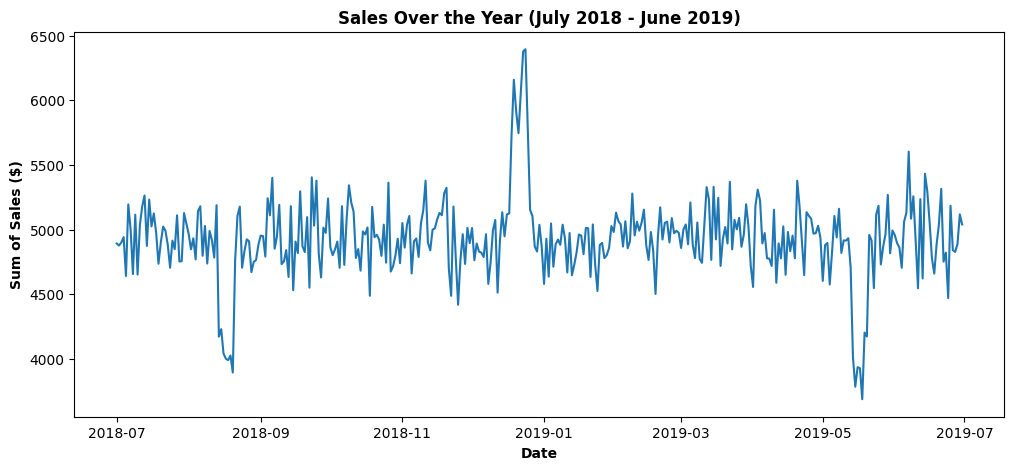

In [76]:
plt.figure(figsize=(12,5))
plt.title('Sales Over the Year (July 2018 - June 2019)', fontweight='bold')
sns.lineplot(x=df['DATE'], y=df['TOT_SALES'], estimator='sum', errorbar=None)
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Sum of Sales ($)', fontweight='bold')
plt.show()

The **highest sales** occured at **the end of the year**, most likely due to the holiday season and new year celebration, people tend to gather with family and friends. This seasonal surge highlights importance of year end promotional campaigns.

In [77]:
df_sales = df[['DATE', 'LYLTY_CARD_NBR', 'TOT_SALES',]]
df_sales['MONTH'] = pd.to_datetime(df_sales['DATE'].apply(lambda x: str(x)[:7]))

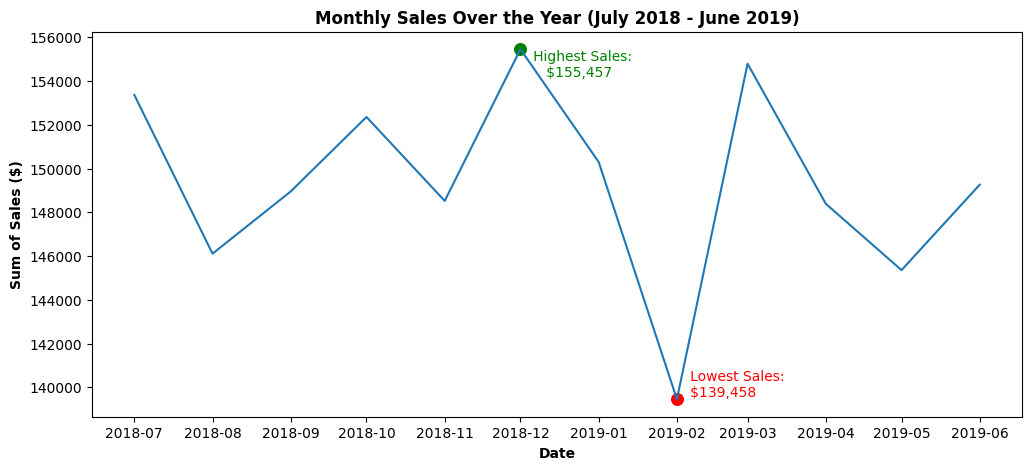

In [78]:
pivot = df_sales.pivot_table(index='MONTH', values='TOT_SALES', aggfunc='sum')
max_sales = pivot.sort_values('TOT_SALES', ascending=False).iloc[0].item()
min_sales = pivot.sort_values('TOT_SALES', ascending=False).iloc[-1].item()
max_date = pivot.idxmax()
min_date = pivot.idxmin()

plt.figure(figsize=(12,5))
plt.title('Monthly Sales Over the Year (July 2018 - June 2019)', fontweight='bold')

sns.lineplot(pivot, legend=False)

plt.scatter(max_date, max_sales, color='green', s=70)
plt.text(max_date, max_sales, f'   Highest Sales:\n      ${max_sales:,.0f}', verticalalignment='top', color='green')

plt.scatter(min_date, min_sales, color='red', s=70)
plt.text(min_date, min_sales, f'   Lowest Sales:\n   ${min_sales:,.0f}', verticalalignment='bottom', color='red')

plt.xlabel('Date', fontweight='bold')
plt.ylabel('Sum of Sales ($)', fontweight='bold')
plt.xticks(ticks=df_sales['MONTH'].unique(), labels=[dt.strftime('%Y-%m') for dt in df_sales['MONTH'].unique()])
plt.show()

In line with the daily sales data, monthly sales peaked noticeably in **December** 2018, reaching **$155,457**. The lowest total sales occured in February 2019 with AU$139,458.

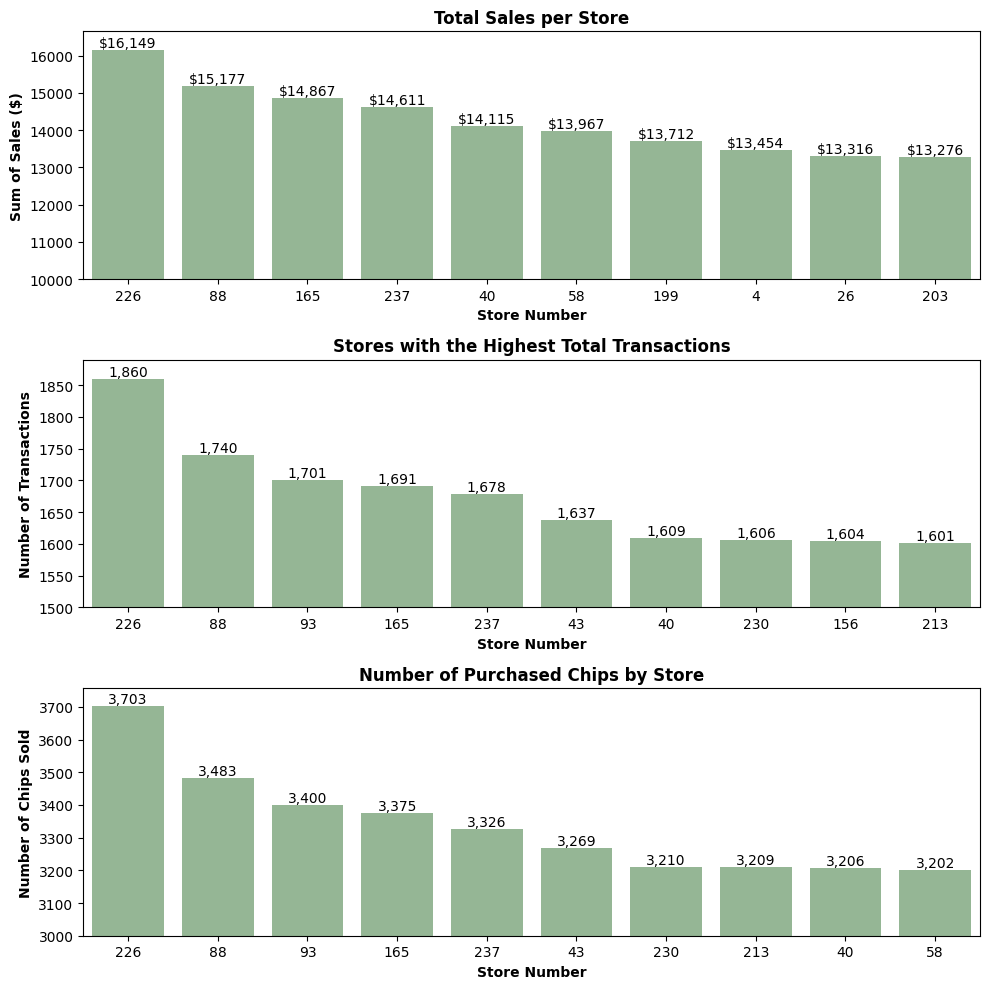

In [79]:
plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
plt.title('Total Sales per Store', fontweight='bold')
data = df.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values(ascending=False)
ax = sns.barplot(data.head(10), order=data.head(10).index, color='darkseagreen')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'${p.get_height():,.0f}', ha='center', va='bottom')
plt.ylim(10000, data.max()+500)
plt.xlabel('Store Number', fontweight='bold')
plt.ylabel('Sum of Sales ($)', fontweight='bold')

plt.subplot(3,1,2)
plt.title('Stores with the Highest Total Transactions', fontweight='bold')
data = df.groupby('STORE_NBR')['TXN_ID'].nunique().sort_values(ascending=False)
ax = sns.barplot(data.head(10), order=data.head(10).index, color='darkseagreen')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():,.0f}', ha='center', va='bottom')
plt.ylim(1500, data.max()+30)
plt.xlabel('Store Number', fontweight='bold')
plt.ylabel('Number of Transactions', fontweight='bold')

plt.subplot(3,1,3)
plt.title('Number of Purchased Chips by Store', fontweight='bold')
data = df.groupby('STORE_NBR')['PROD_QTY'].sum().sort_values(ascending=False)
ax = sns.barplot(data.head(10), order=data.head(10).index, color='darkseagreen')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():,.0f}', ha='center', va='bottom')
plt.ylim(3000, data.max()+55)
plt.xlabel('Store Number', fontweight='bold')
plt.ylabel('Number of Chips Sold', fontweight='bold')

plt.tight_layout()
plt.show()

**Store 226** generated the most sales with **total sales of $16,149**. Additionally, it also recorded the highest number of chip transactions, **exceeding 1,800 transactions** over the year and **more than 3,700 chips sold**.

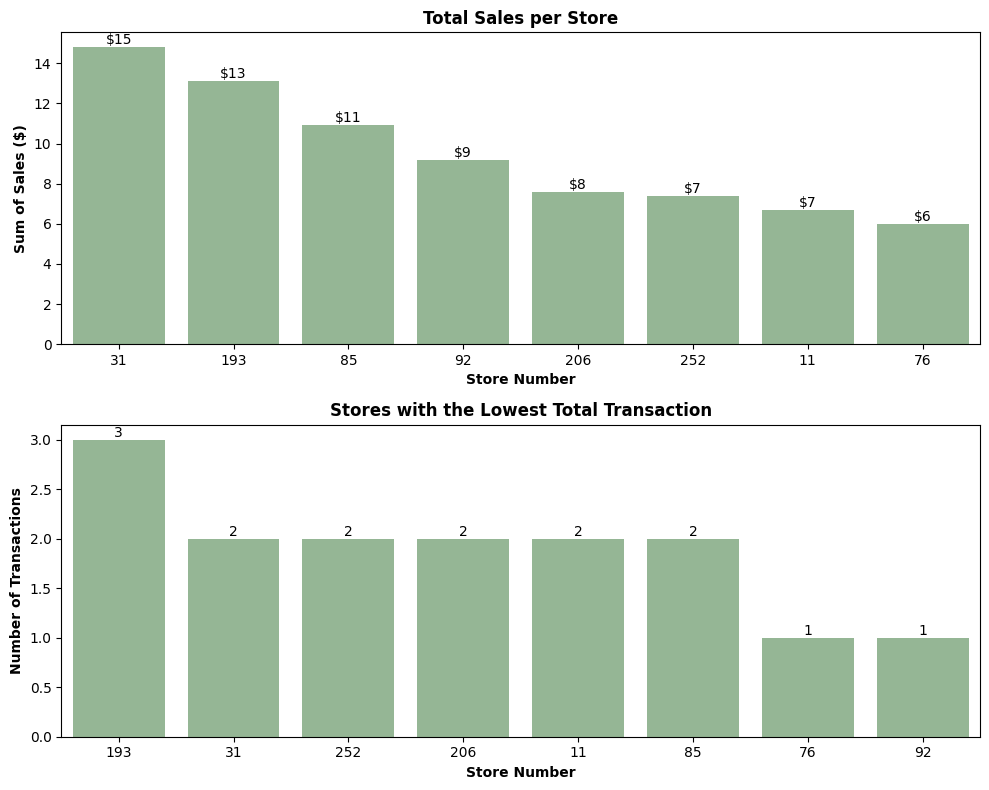

In [80]:
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.title('Total Sales per Store', fontweight='bold')
data = df.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values(ascending=False).tail(8)
ax = sns.barplot(data.tail(8), order=data.tail(8).index, color='darkseagreen')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'${p.get_height():,.0f}', ha='center', va='bottom')
plt.xlabel('Store Number', fontweight='bold')
plt.ylabel('Sum of Sales ($)', fontweight='bold')

plt.subplot(2,1,2)
plt.title('Stores with the Lowest Total Transaction', fontweight='bold')
data = df.groupby('STORE_NBR')['TXN_ID'].nunique().sort_values(ascending=False).tail(8)
ax = sns.barplot(data, order=data.index, color='darkseagreen')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():,.0f}', ha='center', va='bottom')
plt.xlabel('Store Number', fontweight='bold')
plt.ylabel('Number of Transactions', fontweight='bold')

plt.tight_layout()
plt.show()

Eight stores recorded sales **below $20**, with Store 92 and Store 76 reporting the lowest number of chip transactions.

> **Products**

In [81]:
df.groupby('PROD_BRAND')[['PROD_QTY', 'TOT_SALES']].sum().sort_values('TOT_SALES', ascending=False)

,PROD_QTY,TOT_SALES
PROD_BRAND,,
Kettle,79051,390239.8
Doritos,48331,226329.9
Smiths,60337,224654.2
Pringles,48019,177655.5
Infuzions,27119,99047.6
Red Rock Deli,33646,95046.0
Thins,26929,88852.5
Twisties,18118,81522.1
Cobs,18571,70569.8


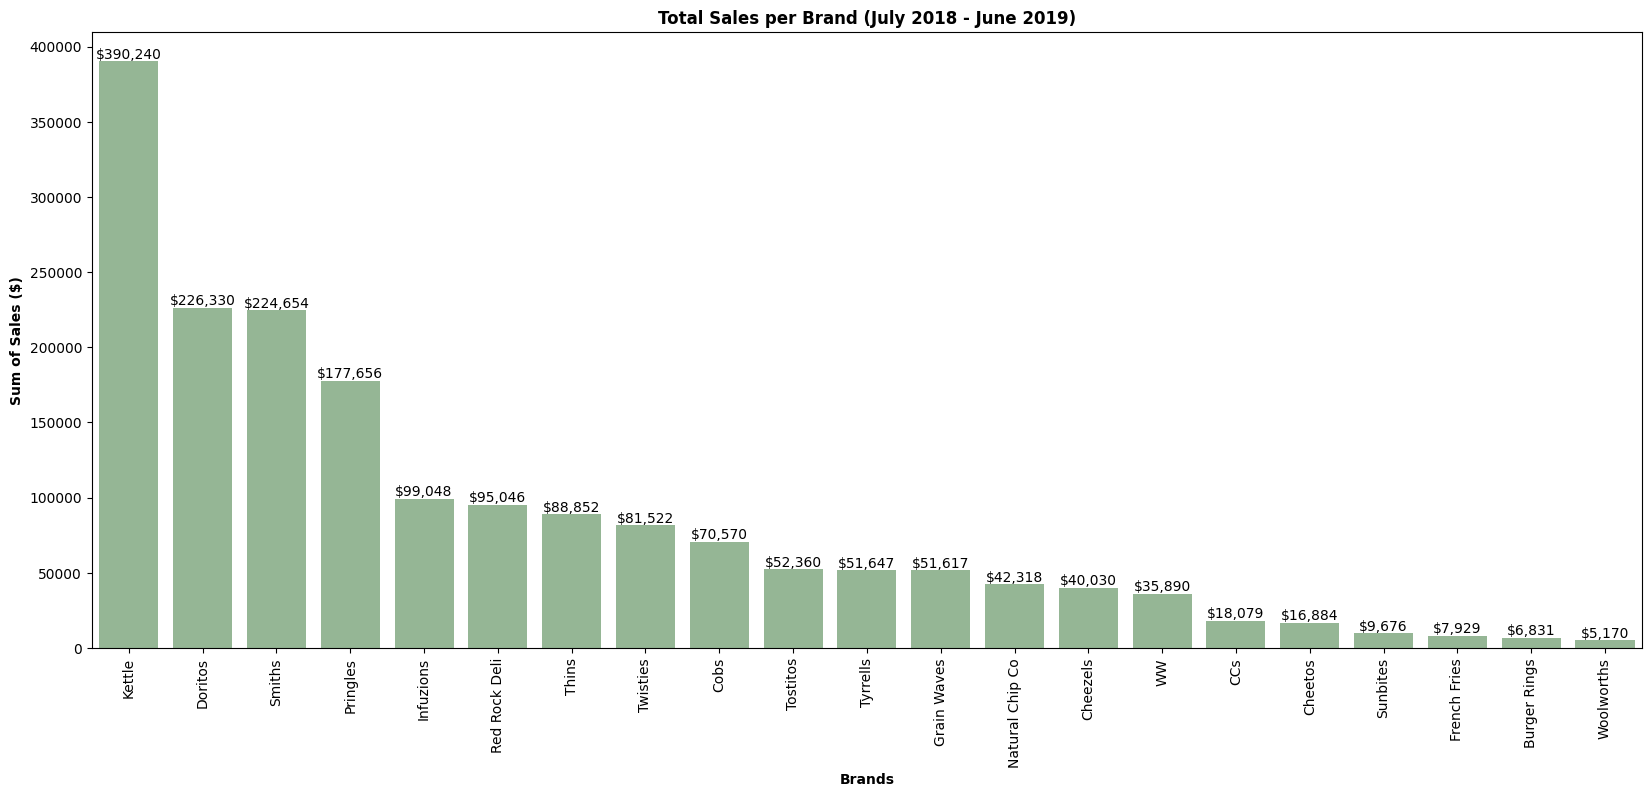

In [82]:
plt.figure(figsize=(20,8))
plt.title('Total Sales per Brand (July 2018 - June 2019)', fontweight='bold')
ax = sns.barplot(df.groupby('PROD_BRAND')['TOT_SALES'].sum().sort_values(ascending=False), color='darkseagreen')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'${p.get_height():,.0f}', ha='center', va='bottom')
plt.xlabel('Brands', fontweight='bold')
plt.ylabel('Sum of Sales ($)', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

**Kettle** leads by a wide margin, with **over $390,000** in chip sales, making it the top-selling brand. Followed by **Doritos** as the second highest brand with **$226,330**, **Smiths** follows closely behind with **$224,654**. Meanwhile, after the top 4 brands, there is a declined in sales. Brands like CCs, Cheetos, Sunbites, French Fries, Burger Rings, and Woolworths contribute relatively low sales, under $20,000.

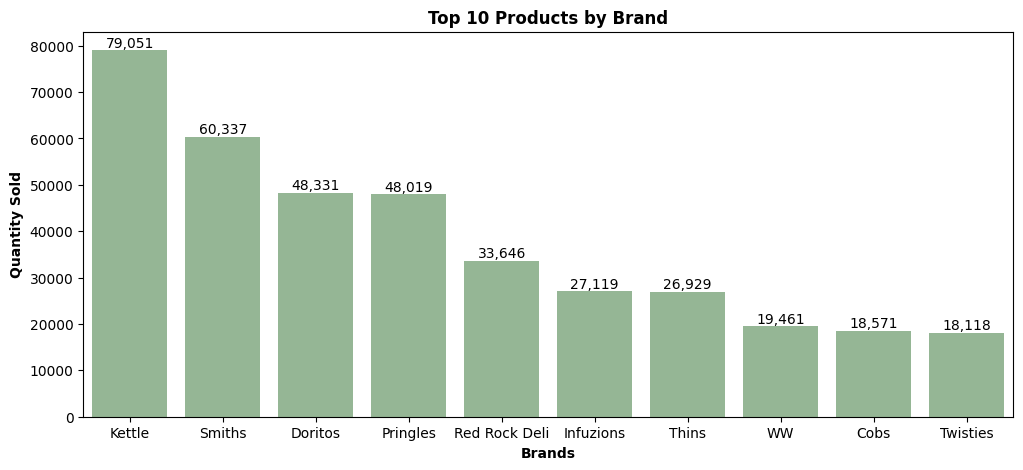

In [83]:
plt.figure(figsize=(12,5))
plt.title('Top 10 Products by Brand', fontweight='bold')
ax = sns.barplot(df.groupby('PROD_BRAND')['PROD_QTY'].sum().sort_values(ascending=False).head(10), color='darkseagreen')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():,.0f}', ha='center', va='bottom')
plt.xlabel('Brands', fontweight='bold')
plt.ylabel('Quantity Sold', fontweight='bold')
plt.show()

Sales data indicates that **Kettle** was the most frequently purchased brand, with **over 79,000 bags of chips sold**. This is probably because they offer a variety of flavors. Customers also frequently bought Smiths, Doritos, Pringles, and Red Rock Deli, all of which have a wide range of flavors.

In [84]:
var = []
for i in df['PROD_BRAND'].value_counts().index:
    var.append(df[df['PROD_BRAND'] == i]['PROD_NAME'].nunique())

for i, j in list(zip(df['PROD_BRAND'].value_counts().index, var)):
    print(f'{i}: {j} flavor(s)')

Kettle: 13 flavor(s)
Smiths: 18 flavor(s)
Doritos: 8 flavor(s)
Pringles: 8 flavor(s)
Red Rock Deli: 12 flavor(s)
Infuzions: 5 flavor(s)
Thins: 5 flavor(s)
WW: 7 flavor(s)
Cobs: 3 flavor(s)
Twisties: 3 flavor(s)
Grain Waves: 3 flavor(s)
Natural Chip Co: 5 flavor(s)
Tyrrells: 2 flavor(s)
Tostitos: 2 flavor(s)
Cheezels: 2 flavor(s)
CCs: 3 flavor(s)
Sunbites: 2 flavor(s)
Cheetos: 2 flavor(s)
Burger Rings: 1 flavor(s)
Woolworths: 1 flavor(s)
French Fries: 1 flavor(s)


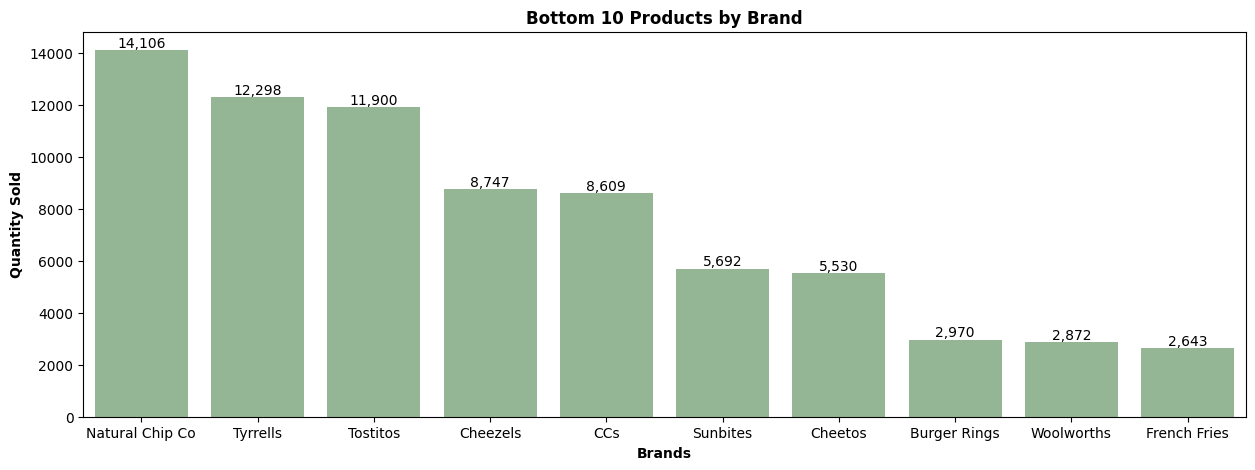

In [85]:
plt.figure(figsize=(15,5))
plt.title('Bottom 10 Products by Brand', fontweight='bold')
ax = sns.barplot(df.groupby('PROD_BRAND')['PROD_QTY'].sum().sort_values(ascending=False).tail(10), color='darkseagreen')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():,.0f}', ha='center', va='bottom')
plt.xlabel('Brands', fontweight='bold')
plt.ylabel('Quantity Sold', fontweight='bold')
plt.show()

Sales data indicates that **Burger Rings**, **Woolworths** and **French Fries** are among the **least purchased** chips varieties.

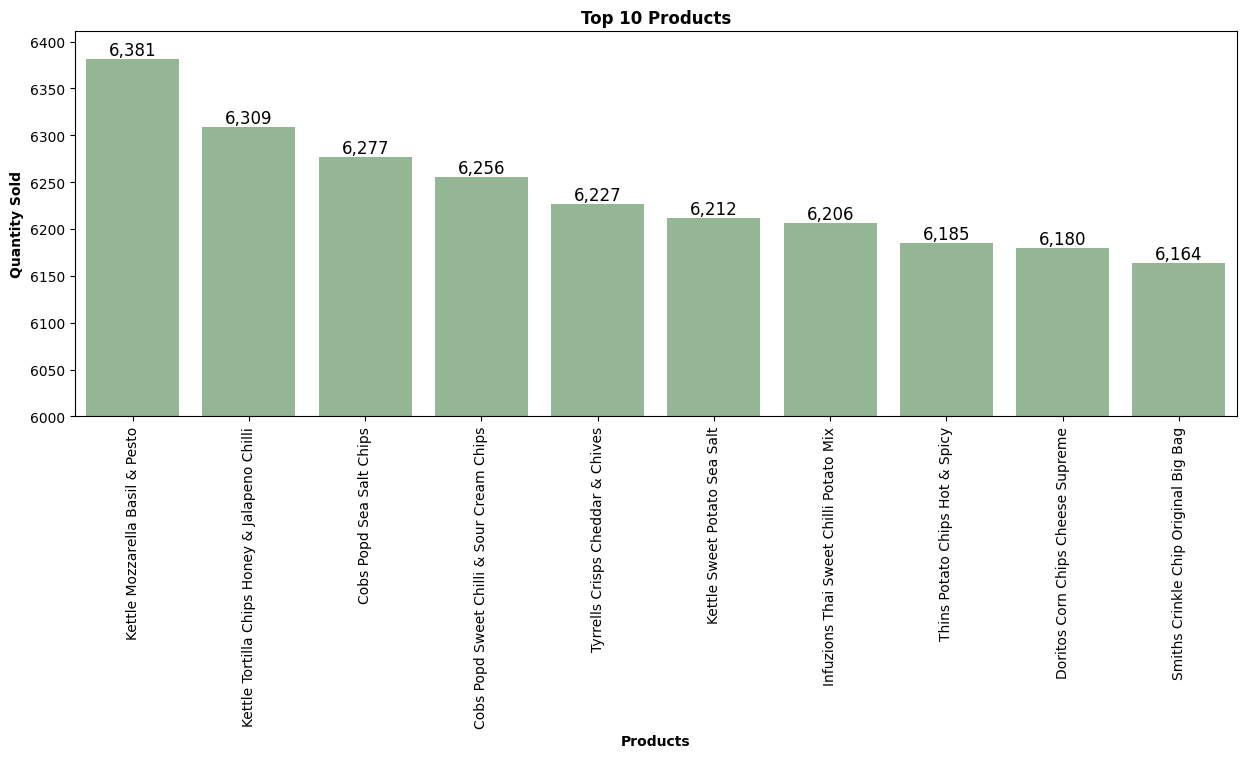

In [86]:
plt.figure(figsize=(15,5))
plt.title('Top 10 Products', fontweight='bold')
data = df.groupby('PROD_NAME')['PROD_QTY'].sum().sort_values(ascending=False)
ax = sns.barplot(data.head(10), color='darkseagreen')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():,.0f}', ha='center', va='bottom', fontsize=12)
plt.xlabel('Products', fontweight='bold')
plt.ylabel('Quantity Sold', fontweight='bold')
plt.xticks(rotation=90)
plt.ylim(6000, data.max()+30)
plt.show()

**Kettle** dominates in product popularity with **multiple top selling items**. Kettle products appear the most among the top 10 most purchased products, with Kettle Mozzarella Basil & Pesto leading at 6,381 units sold. Kettle Tortilla Chips Honey & Jalapeno Chili and Kettle Sweet Potato Sea Salt also make the list, highlighting the brand's popularity across different flavor.

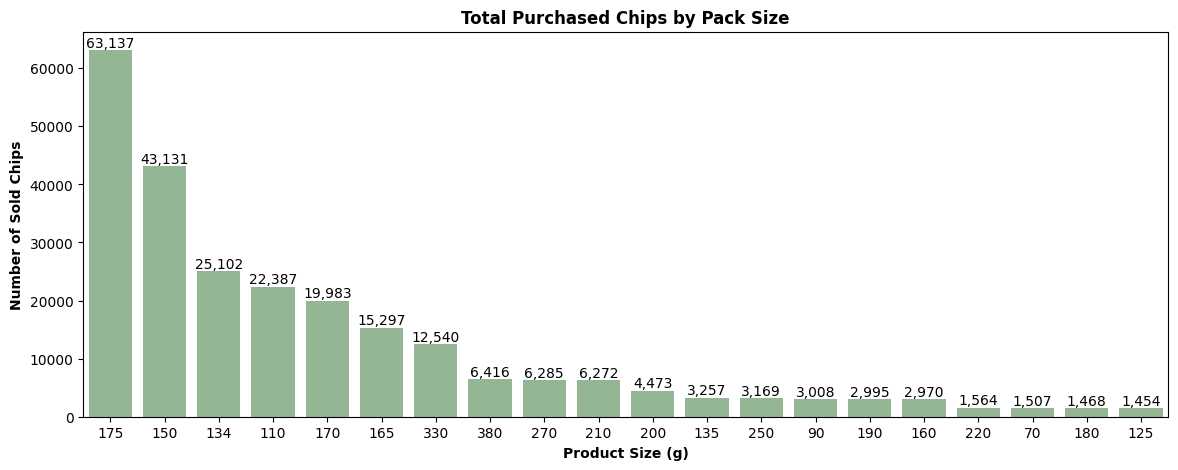

In [87]:
plt.figure(figsize=(14,5))
plt.title('Total Purchased Chips by Pack Size', fontweight='bold')
ax = sns.countplot(x=df['PROD_GR'], order=df['PROD_GR'].value_counts().index, color='darkseagreen')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():,.0f}', ha='center', va='bottom')
plt.xlabel('Product Size (g)', fontweight='bold')
plt.ylabel('Number of Sold Chips', fontweight='bold')
plt.show()

The **175g** chips size leads overwhelmingly as the **most purchased**, with 63,137 units sold. Followed by the 150g chips at 43,131 units sold.

### **Customer**

In [88]:
df['LYLTY_CARD_NBR'].nunique()

71251

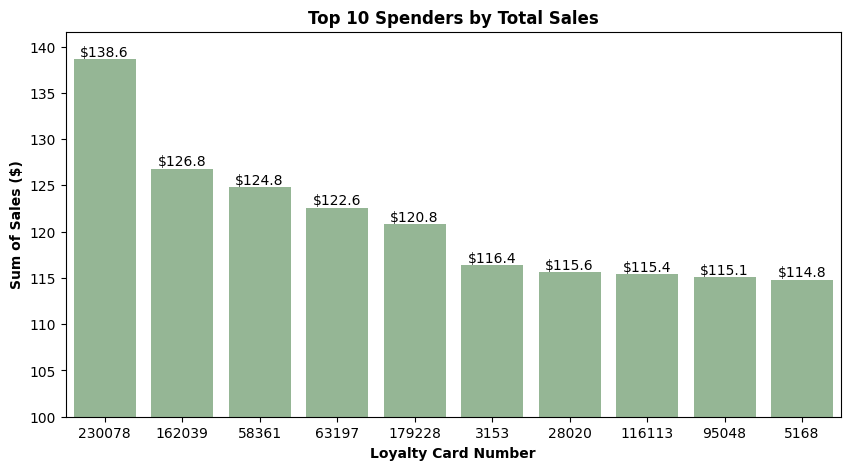

In [89]:
plt.figure(figsize=(10,5))
plt.title('Top 10 Spenders by Total Sales', fontweight='bold')
data = df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum()
ax = sns.barplot(data.sort_values(ascending=False).head(10), order=data.sort_values(ascending=False).head(10).index, color='darkseagreen')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'${p.get_height():,.1f}', ha='center', va='bottom')
plt.ylim(100, data.max()+3)
plt.xlabel('Loyalty Card Number', fontweight='bold')
plt.ylabel('Sum of Sales ($)', fontweight='bold')
plt.show()

The highest-spender (Loyalty Card No. 230078) spent about $139, while the 10th spender spender (Loyalty Card No. 5168) spent about $115, a relatively small range, indicating **consistent high spending among the top 10**.

In [90]:
lcn = data.sort_values(ascending=False).head(10)
prem = []
lifestage = []
for i in lcn.index:
    prem.append(df[df['LYLTY_CARD_NBR'] == i]['PREMIUM_CUSTOMER'].unique())
    lifestage.append(df[df['LYLTY_CARD_NBR'] == i]['LIFESTAGE'].unique())

pd.DataFrame({
    'LYLTY_CARD_NBR': lcn.index,
    'PREMIUM_CUSTOMER': prem,
    'LIFESTAGE': lifestage,
    'TOTAL_SALES': lcn.values
})

,LYLTY_CARD_NBR,PREMIUM_CUSTOMER,LIFESTAGE,TOTAL_SALES
0,230078,[Budget],[OLDER FAMILIES],138.6
1,162039,[Mainstream],[OLDER FAMILIES],126.8
2,58361,[Budget],[YOUNG FAMILIES],124.8
3,63197,[Budget],[OLDER FAMILIES],122.6
4,179228,[Budget],[YOUNG FAMILIES],120.8
5,3153,[Premium],[MIDAGE SINGLES/COUPLES],116.4
6,28020,[Premium],[OLDER FAMILIES],115.6
7,116113,[Premium],[OLDER SINGLES/COUPLES],115.4
8,95048,[Mainstream],[YOUNG SINGLES/COUPLES],115.1
9,5168,[Mainstream],[OLDER FAMILIES],114.8


Furthermore, **40%** of top 10 spenders belong to the **Budget** tier, while 30% belong to the Mainstream tier and another 30% to the Premium tier. Additionally, **half** are part of the **Older Families** segment.

> Loyalty Status

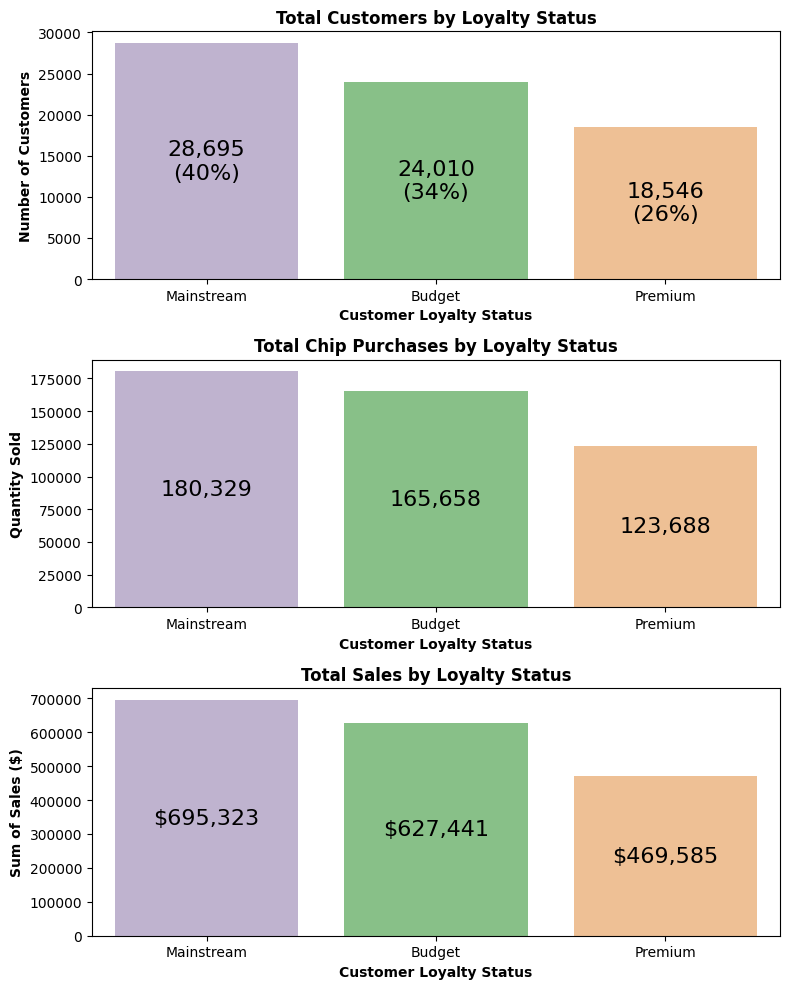

In [91]:
plt.figure(figsize=(8,10))

plt.subplot(3,1,1)
plt.title('Total Customers by Loyalty Status', fontweight='bold')
cnt = df.groupby('PREMIUM_CUSTOMER')[['LYLTY_CARD_NBR']].nunique().reset_index()
ax = sns.barplot(x=cnt['PREMIUM_CUSTOMER'], y=cnt['LYLTY_CARD_NBR'], hue=cnt['PREMIUM_CUSTOMER'], order=df.groupby('PREMIUM_CUSTOMER')['LYLTY_CARD_NBR'].nunique().sort_values(ascending=False).index, palette='Accent')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}\n({p.get_height()/df['LYLTY_CARD_NBR'].nunique() * 100:.0f}%)', (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2), ha='center', va='center', fontsize=16)
plt.xlabel('Customer Loyalty Status', fontweight='bold')
plt.ylabel('Number of Customers', fontweight='bold')

plt.subplot(3,1,2)
plt.title('Total Chip Purchases by Loyalty Status', fontweight='bold')
qty = df.groupby('PREMIUM_CUSTOMER')[['PROD_QTY']].sum().reset_index()
ax = sns.barplot(x=qty['PREMIUM_CUSTOMER'], y=qty['PROD_QTY'], hue=qty['PREMIUM_CUSTOMER'], order=df.groupby('PREMIUM_CUSTOMER')['PROD_QTY'].sum().sort_values(ascending=False).index, palette='Accent')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2), ha='center', va='center', fontsize=16)
plt.xlabel('Customer Loyalty Status', fontweight='bold')
plt.ylabel('Quantity Sold', fontweight='bold')

plt.subplot(3,1,3)
plt.title('Total Sales by Loyalty Status', fontweight='bold')
qty = df.groupby('PREMIUM_CUSTOMER')[['TOT_SALES']].sum().reset_index()
ax = sns.barplot(x=qty['PREMIUM_CUSTOMER'], y=qty['TOT_SALES'], hue=qty['PREMIUM_CUSTOMER'], order=df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().sort_values(ascending=False).index, palette='Accent')
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2), ha='center', va='center', fontsize=16)
plt.xlabel('Customer Loyalty Status', fontweight='bold')
plt.ylabel('Sum of Sales ($)', fontweight='bold')

plt.tight_layout()
plt.show()

**Mainstream** (**40%**) and **Budget** (**34%**) tiers comprise the majority of the customer base, while only **26%** (18,546 customers) belong to the **Premium** loyalty tier. Depsite being the smallest group, Premium customers likely represent a high-value segment in terms of revenue potential.

Customer count, purchase volume, and total sales are generally aligned across tiers, with the **Mainstream** tier **leading** in each category.

In [92]:
display(df.groupby('PREMIUM_CUSTOMER')[['PRICE']].mean().sort_values('PRICE', ascending=False).round(1), df.groupby('PREMIUM_CUSTOMER')[['TOT_SALES']].mean().sort_values('TOT_SALES', ascending=False).round(1), df.groupby('PREMIUM_CUSTOMER')[['PROD_QTY']].mean().sort_values('PROD_QTY', ascending=False).round())

,PRICE
PREMIUM_CUSTOMER,
Mainstream,3.9
Premium,3.8
Budget,3.8


,TOT_SALES
PREMIUM_CUSTOMER,
Mainstream,7.3
Premium,7.2
Budget,7.2


,PROD_QTY
PREMIUM_CUSTOMER,
Budget,2.0
Premium,2.0
Mainstream,2.0


Customers spent approximately $3.80 to $3.90 per chip purchase, with average total sales ranging from $7.20 to $7.30. Across all tiers, customers bought an average of two bags.

> Lifestage

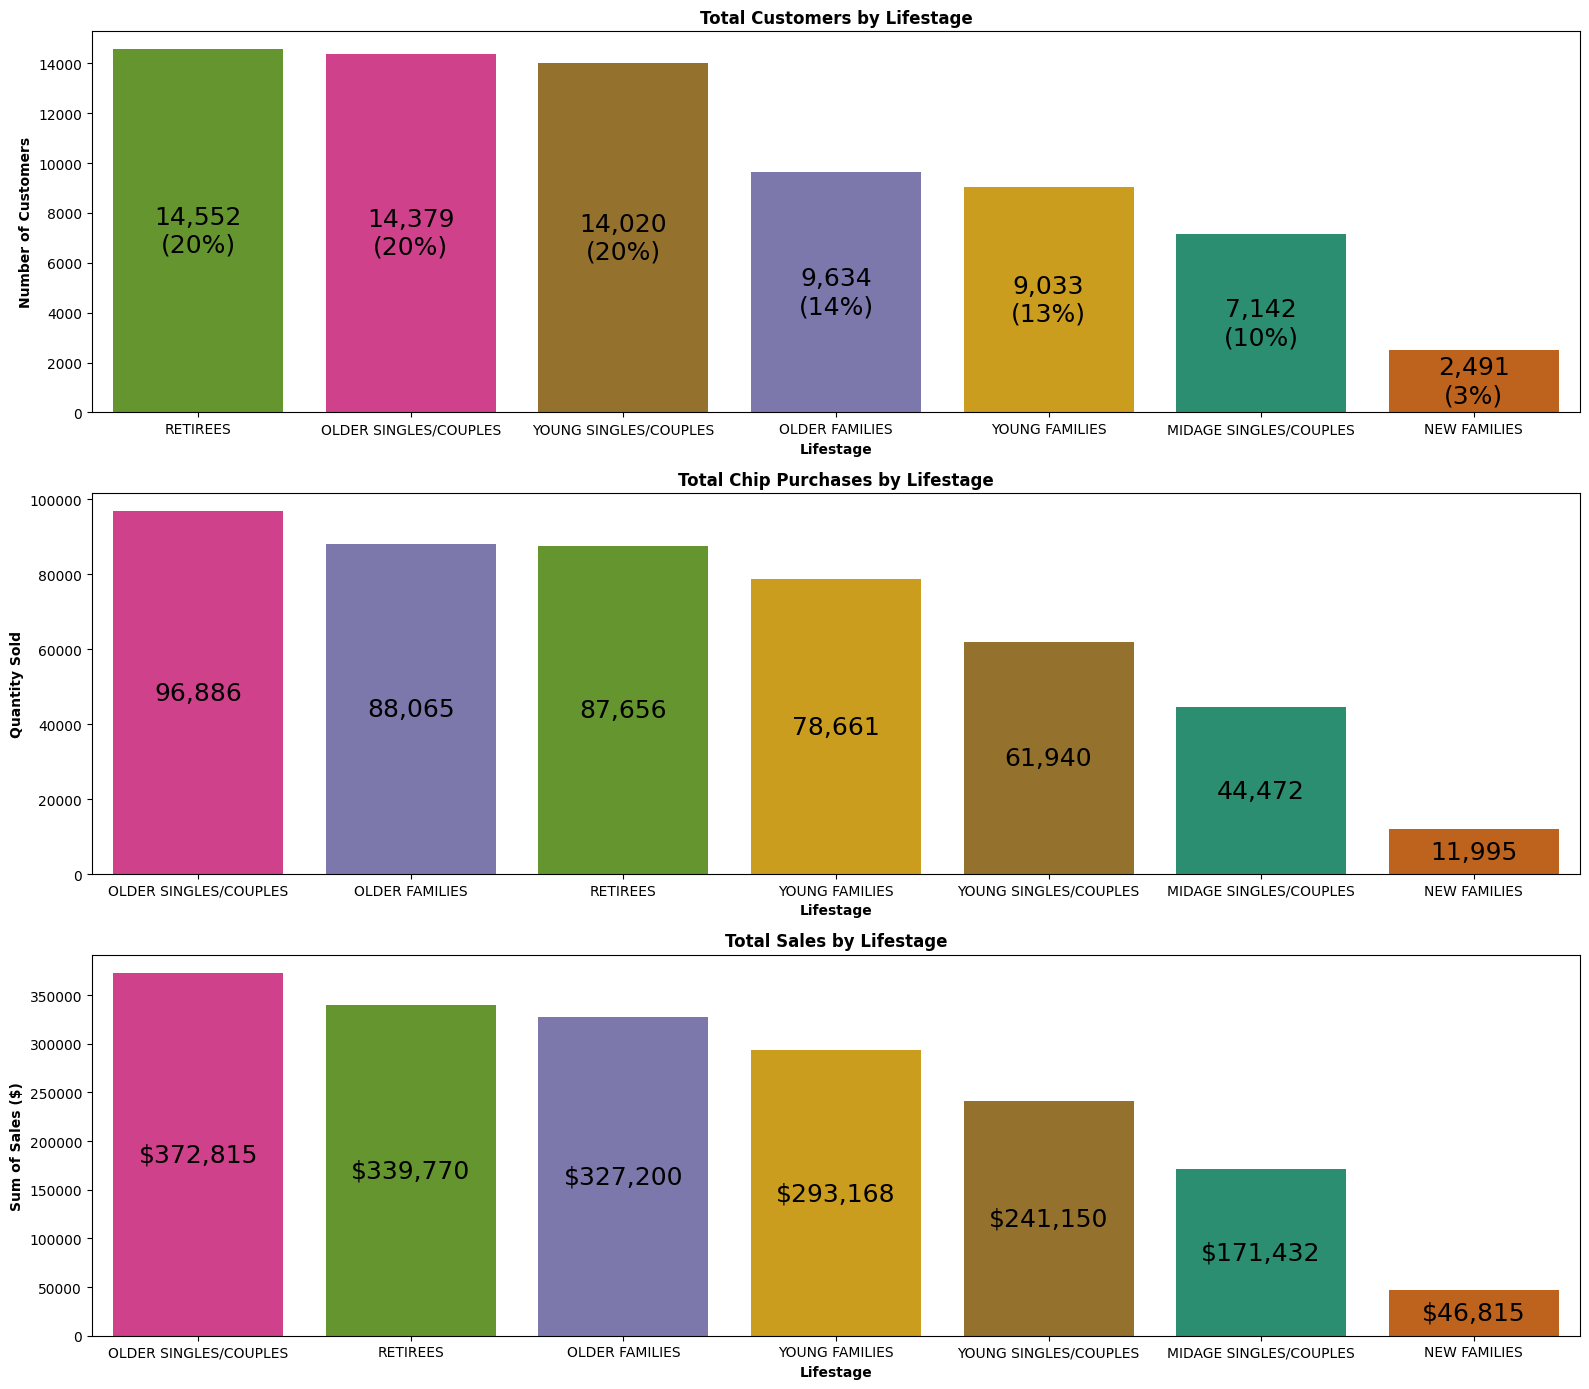

In [93]:
plt.figure(figsize=(16,14))

plt.subplot(3,1,1)
plt.title('Total Customers by Lifestage', fontweight='bold')
cnt = df.groupby('LIFESTAGE')[['LYLTY_CARD_NBR']].nunique().reset_index()
ax = sns.barplot(x=cnt['LIFESTAGE'], y=cnt['LYLTY_CARD_NBR'], hue=cnt['LIFESTAGE'], order=df.groupby('LIFESTAGE')['LYLTY_CARD_NBR'].nunique().sort_values(ascending=False).index, palette='Dark2')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}\n({p.get_height()/df['LYLTY_CARD_NBR'].nunique() * 100:.0f}%)', (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2), ha='center', va='center', fontsize=18)
plt.xlabel('Lifestage', fontweight='bold')
plt.ylabel('Number of Customers', fontweight='bold')

plt.subplot(3,1,2)
plt.title('Total Chip Purchases by Lifestage', fontweight='bold')
qty = df.groupby('LIFESTAGE')[['PROD_QTY']].sum().reset_index()
ax = sns.barplot(x=qty['LIFESTAGE'], y=qty['PROD_QTY'], hue=qty['LIFESTAGE'], order=df.groupby('LIFESTAGE')['PROD_QTY'].sum().sort_values(ascending=False).index, palette='Dark2')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2), ha='center', va='center', fontsize=18)
plt.xlabel('Lifestage', fontweight='bold')
plt.ylabel('Quantity Sold', fontweight='bold')

plt.subplot(3,1,3)
plt.title('Total Sales by Lifestage', fontweight='bold')
qty = df.groupby('LIFESTAGE')[['TOT_SALES']].sum().reset_index()
ax = sns.barplot(x=qty['LIFESTAGE'], y=qty['TOT_SALES'], hue=qty['LIFESTAGE'], order=df.groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending=False).index, palette='Dark2')
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2), ha='center', va='center', fontsize=18)
plt.xlabel('Lifestage', fontweight='bold')
plt.ylabel('Sum of Sales ($)', fontweight='bold')

plt.tight_layout()
plt.show()

Approximately **60%** of the customers base consists **Retirees**, **Older Singles/Couples**, and **Young Singles/Couples**. In contrast, **New Families** make up only **4%** (2,491 customers), highlighting a significant underrepresentation of younger, family-starting segments.

Despite being part of the largest segments, total chips purchases from the Retirees and Young Singles/Couples segment are lower than those from the Older Families segment. Nevertheless, total sales broadly reflect the quantity purchased.

For Older Families, the quantity purchased has a greater impact than the segment size.

The **Older Singles/Couples** segment **leads** in both purchase volume and total sales. 

In [94]:
display(df.groupby('LIFESTAGE')[['PRICE']].mean().sort_values('PRICE', ascending=False).round(1), df.groupby('LIFESTAGE')[['TOT_SALES']].mean().sort_values('TOT_SALES', ascending=False).round(1), df.groupby('LIFESTAGE')[['PROD_QTY']].mean().sort_values('PROD_QTY', ascending=False).round())

,PRICE
LIFESTAGE,
NEW FAMILIES,3.9
YOUNG SINGLES/COUPLES,3.9
RETIREES,3.9
MIDAGE SINGLES/COUPLES,3.8
OLDER SINGLES/COUPLES,3.8
YOUNG FAMILIES,3.7
OLDER FAMILIES,3.7


,TOT_SALES
LIFESTAGE,
OLDER SINGLES/COUPLES,7.4
RETIREES,7.3
MIDAGE SINGLES/COUPLES,7.3
NEW FAMILIES,7.2
YOUNG FAMILIES,7.2
OLDER FAMILIES,7.2
YOUNG SINGLES/COUPLES,7.1


,PROD_QTY
LIFESTAGE,
OLDER FAMILIES,2.0
YOUNG FAMILIES,2.0
OLDER SINGLES/COUPLES,2.0
MIDAGE SINGLES/COUPLES,2.0
RETIREES,2.0
NEW FAMILIES,2.0
YOUNG SINGLES/COUPLES,2.0


Customers spent around $3.70-$3.90 per chip purchase, with total sales averaging $7.10-$7.40. On average, customers across all tiers purchased two bags.

> Loyalty Status and Lifestage

In [95]:
ct = pd.crosstab(index=df['LIFESTAGE'], columns=df['PREMIUM_CUSTOMER'], values=df['LYLTY_CARD_NBR'], aggfunc='nunique')
ct['TOTAL'] = ct.sum(axis=1)
ct = ct.sort_values('TOTAL', ascending=False)
ct = ct.drop(columns=['TOTAL'])
ct

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
RETIREES,4380,6364,3808
OLDER SINGLES/COUPLES,4849,4855,4675
YOUNG SINGLES/COUPLES,3661,7874,2485
OLDER FAMILIES,4608,2789,2237
YOUNG FAMILIES,3946,2689,2398
MIDAGE SINGLES/COUPLES,1481,3293,2368
NEW FAMILIES,1085,831,575


In [96]:
total_mapping = {}
for i, j in zip(range(len(ct.index.tolist())), ct.index.tolist()):  
    total_mapping[i] = ct.sum(axis=1).loc[j]

total_mapping

{0: 14552, 1: 14379, 2: 14020, 3: 9634, 4: 9033, 5: 7142, 6: 2491}

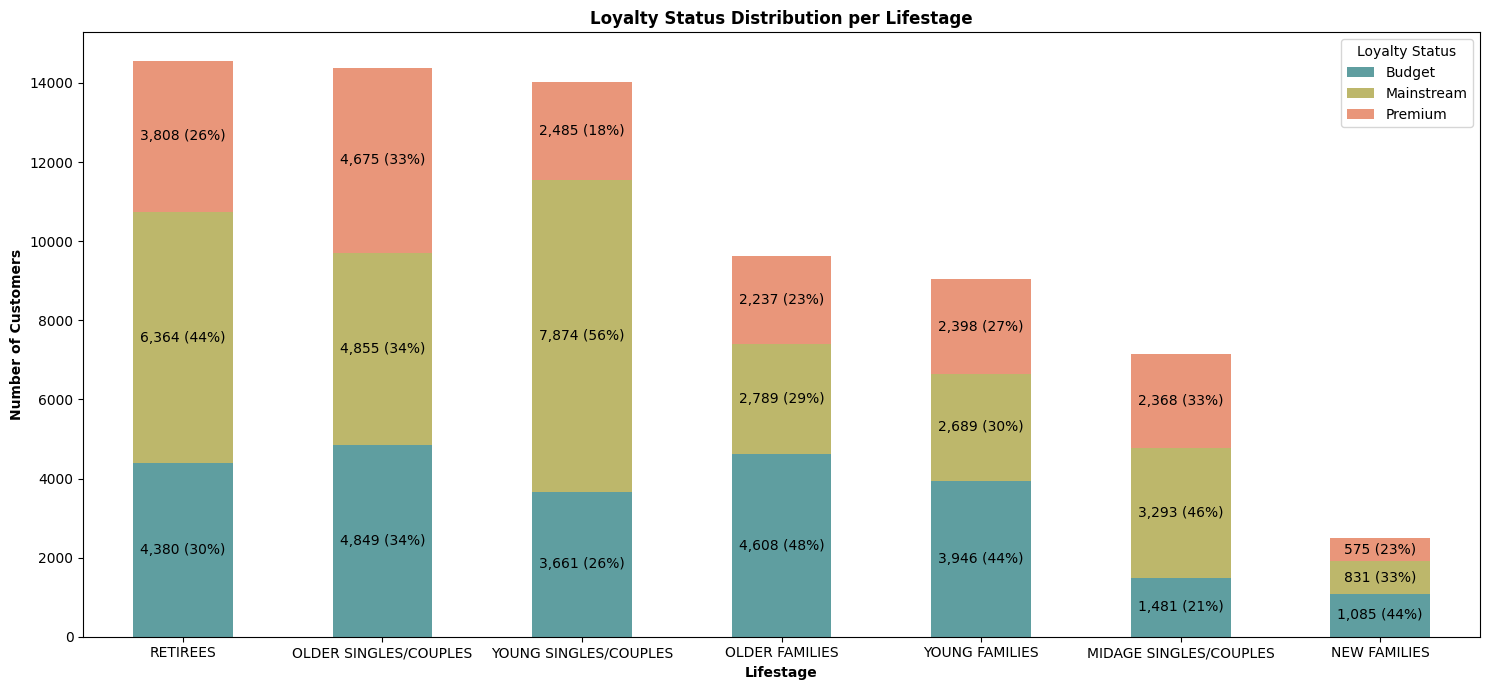

In [97]:
plt.figure(figsize=(15,7))
plt.title('Loyalty Status Distribution per Lifestage', fontweight='bold')
ax = ct.plot(kind='bar', stacked=True, ax=plt.gca(), color=['cadetblue', 'darkkhaki', 'darksalmon'])
for p in ax.patches:
    if p.get_height() > 0:
        abs_value = int(p.get_height())
        bar_index = round(p.get_x())
        total = total_mapping.get(bar_index)
        pct_value = abs_value / total * 100
        ax.annotate(f'{abs_value:,.0f} ({pct_value:.0f}%)', (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2), ha='center', va='center')
plt.xticks(rotation=360)
plt.xlabel('Lifestage', fontweight='bold')
plt.ylabel('Number of Customers', fontweight='bold')
plt.legend(title='Loyalty Status')
plt.tight_layout()
plt.show()

**More than 50%** of customers (7,874) in the **Young Singles/Couples** segment belong to the **Mainstream** tier, making it the largest Mainstream group across all segment and the largest customer group overall. The segment with the **highest number of Premium** tier customers is **Older Singles/Couples**, with 4,675 customers. While nearly 50% of customers in the Older Families segment fall under the Budget tier, the segment with the **highest number of Budget** tier customers overall is **Older Singles/Couples**, with 4,849 customers.

In [98]:
ct_cnt = pd.crosstab(index=df['LIFESTAGE'], columns=df['PREMIUM_CUSTOMER'], values=df['PROD_QTY'], aggfunc='sum')
ct_cnt['TOTAL'] = ct_cnt.sum(axis=1)
ct_cnt = ct_cnt.sort_values('TOTAL', ascending=False)
ct_cnt = ct_cnt.drop(columns=['TOTAL'])
ct_cnt

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
OLDER SINGLES/COUPLES,32727,32567,31592
OLDER FAMILIES,41989,25817,20259
RETIREES,26802,37655,23199
YOUNG FAMILIES,34499,23263,20899
YOUNG SINGLES/COUPLES,15525,35890,10525
MIDAGE SINGLES/COUPLES,8911,21109,14452
NEW FAMILIES,5205,4028,2762


In [99]:
total_mapping = {}
for i, j in zip(range(len(ct_cnt.index.tolist())), ct_cnt.index.tolist()):  
    total_mapping[i] = ct_cnt.sum(axis=1).loc[j]

total_mapping

{0: 96886, 1: 88065, 2: 87656, 3: 78661, 4: 61940, 5: 44472, 6: 11995}

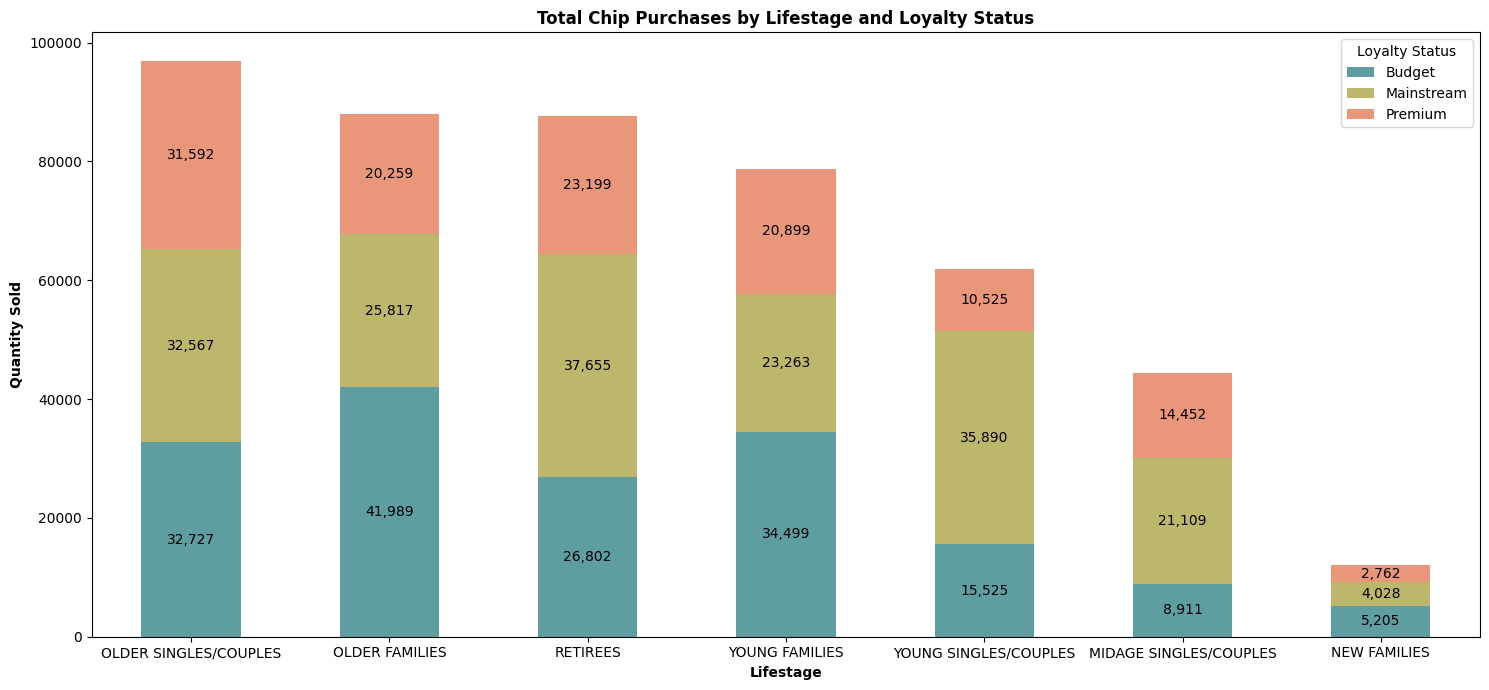

In [100]:
plt.figure(figsize=(15,7))
plt.title('Total Chip Purchases by Lifestage and Loyalty Status', fontweight='bold')
ax = ct_cnt.plot(kind='bar', stacked=True, ax=plt.gca(), color=['cadetblue', 'darkkhaki', 'darksalmon'])
for p in ax.patches:
    if p.get_height() > 0:
        abs_value = int(p.get_height())
        bar_index = round(p.get_x())
        total = total_mapping.get(bar_index)
        pct_value = abs_value / total * 100
        ax.annotate(f'{abs_value:,.0f}', (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2), ha='center', va='center')
plt.xticks(rotation=360)
plt.xlabel('Lifestage', fontweight='bold')
plt.ylabel('Quantity Sold', fontweight='bold')
plt.legend(title='Loyalty Status')
plt.tight_layout()
plt.show()

Despite not being the largest customer segment, the **Budget-Older Families** group recorded the highest purchase volume, selling **over 41,000** bags of chips. Followed by the Mainstream-Retirees and Mainstream-Young Single/Couples groups at 37,665 and 35,890 bags of chips, respectively.

In [101]:
ct_sales = pd.crosstab(index=df['LIFESTAGE'], columns=df['PREMIUM_CUSTOMER'], values=df['TOT_SALES'], aggfunc='sum')
ct_sales['TOTAL'] = ct_sales.sum(axis=1)
ct_sales = ct_sales.sort_values('TOTAL', ascending=False)
ct_sales = ct_sales.drop(columns=['TOTAL'])
ct_sales

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
OLDER SINGLES/COUPLES,126585.00,123752.70,122477.05
RETIREES,104890.20,144309.15,90570.35
OLDER FAMILIES,156461.55,95894.85,74843.40
YOUNG FAMILIES,128996.25,86053.05,78118.30
YOUNG SINGLES/COUPLES,56900.80,145613.60,38635.10
MIDAGE SINGLES/COUPLES,33230.20,83925.15,54276.75
NEW FAMILIES,20377.25,15774.40,10663.70


In [102]:
total_mapping = {}
for i, j in zip(range(len(ct_sales.index.tolist())), ct_sales.index.tolist()):  
    total_mapping[i] = ct_sales.sum(axis=1).loc[j]

total_mapping

{0: 372814.75,
 1: 339769.69999999995,
 2: 327199.8,
 3: 293167.6,
 4: 241149.50000000003,
 5: 171432.09999999998,
 6: 46815.350000000006}

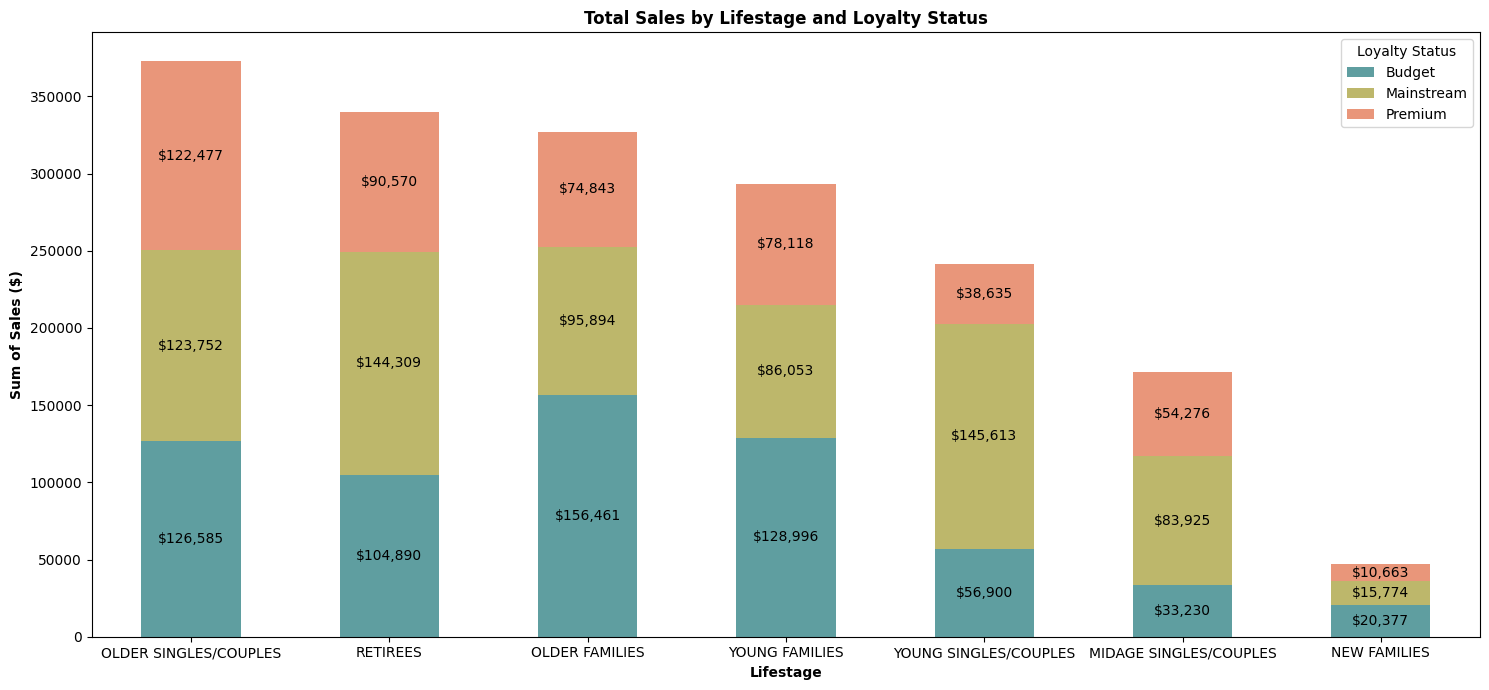

In [103]:
plt.figure(figsize=(15,7))
plt.title('Total Sales by Lifestage and Loyalty Status', fontweight='bold')
ax = ct_sales.plot(kind='bar', stacked=True, ax=plt.gca(), color=['cadetblue', 'darkkhaki', 'darksalmon'])
for p in ax.patches:
    if p.get_height() > 0:
        abs_value = int(p.get_height())
        bar_index = round(p.get_x())
        total = total_mapping.get(bar_index)
        pct_value = abs_value / total * 100
        ax.annotate(f'${abs_value:,.0f}', (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2), ha='center', va='center')
plt.xticks(rotation=360)
plt.xlabel('Lifestage', fontweight='bold')
plt.ylabel('Sum of Sales ($)', fontweight='bold')
plt.legend(title='Loyalty Status')
plt.tight_layout()
plt.show()

With the highest purchase volume, the **Budget-Older Families** segment also **led in total chip sales**, reaching **$156,461**. Additionally, despite being the third highest in purchase volume, the Mainstream-Young Singles/Couples segment recorded the second-highest total chip sales at $145,613. The Mainstream-Retirees follows closely at $144,309.

For the Budget-Older Families, the quantity purchased has a greater impact on sales than the size of the customer segment.

In [104]:
display(df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])[['PRICE']].mean().sort_values('PRICE', ascending=False).round(1), df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])[['TOT_SALES']].mean().sort_values('TOT_SALES', ascending=False).round(1), df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])[['PROD_QTY']].mean().sort_values('PROD_QTY', ascending=False).round())

PRICE
LIFESTAGE              PREMIUM_CUSTOMER       
YOUNG SINGLES/COUPLES  Mainstream          4.0
MIDAGE SINGLES/COUPLES Mainstream          4.0
RETIREES               Budget              3.9
                       Premium             3.9
NEW FAMILIES           Budget              3.9
                       Mainstream          3.9
OLDER SINGLES/COUPLES  Premium             3.9
                       Budget              3.9
NEW FAMILIES           Premium             3.8
RETIREES               Mainstream          3.8
OLDER SINGLES/COUPLES  Mainstream          3.8
MIDAGE SINGLES/COUPLES Premium             3.7
YOUNG FAMILIES         Premium             3.7
                       Budget              3.7
OLDER FAMILIES         Budget              3.7
MIDAGE SINGLES/COUPLES Budget              3.7
OLDER FAMILIES         Mainstream          3.7
YOUNG FAMILIES         Mainstream          3.7
OLDER FAMILIES         Premium             3.7
YOUNG SINGLES/COUPLES  Premium             3.6
                       Budget              3.6

TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
MIDAGE SINGLES/COUPLES Mainstream              7.6
YOUNG SINGLES/COUPLES  Mainstream              7.5
RETIREES               Premium                 7.4
OLDER SINGLES/COUPLES  Premium                 7.4
RETIREES               Budget                  7.4
OLDER SINGLES/COUPLES  Budget                  7.4
NEW FAMILIES           Mainstream              7.3
                       Budget                  7.3
OLDER SINGLES/COUPLES  Mainstream              7.3
YOUNG FAMILIES         Budget                  7.3
OLDER FAMILIES         Budget                  7.2
YOUNG FAMILIES         Premium                 7.2
OLDER FAMILIES         Mainstream              7.2
RETIREES               Mainstream              7.2
OLDER FAMILIES         Premium                 7.2
YOUNG FAMILIES         Mainstream              7.2
NEW FAMILIES           Premium                 7.2
MIDAGE SINGLES/COUPLES Premium                 7.1
                       Budget                  7.1
YOUNG SINGLES/COUPLES  Premium                 6.6
                       Budget                  6.6

PROD_QTY
LIFESTAGE              PREMIUM_CUSTOMER          
OLDER FAMILIES         Mainstream             2.0
                       Premium                2.0
                       Budget                 2.0
YOUNG FAMILIES         Mainstream             2.0
                       Budget                 2.0
                       Premium                2.0
OLDER SINGLES/COUPLES  Budget                 2.0
                       Premium                2.0
MIDAGE SINGLES/COUPLES Mainstream             2.0
OLDER SINGLES/COUPLES  Mainstream             2.0
RETIREES               Premium                2.0
                       Budget                 2.0
MIDAGE SINGLES/COUPLES Premium                2.0
                       Budget                 2.0
RETIREES               Mainstream             2.0
NEW FAMILIES           Premium                2.0
                       Mainstream             2.0
                       Budget                 2.0
YOUNG SINGLES/COUPLES  Mainstream             2.0
                       Budget                 2.0
                       Premium                2.0

Customers spent approximately $3.60 to $4.00 per chip purchase, with average total sales ranging from $6.60 to $7.60. Across all tiers, customers bought an average of two bags.

While the Budget-Older Families group recorded the highest total sales, their mean price per pack is around $3.70 and their average sales per customer are around $7.20. Among all segments, Mainstream-Young Singles/Couples and Mainstream-Midage Singles/Couples recorded the highest in both mean price per pack and average sales per customer.

In [105]:
from scipy.stats import ttest_ind

In [106]:
stats, pvalue = ttest_ind(a = df.loc[(df['PREMIUM_CUSTOMER'] == 'Mainstream') & ((df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES')), 'PRICE'],
                          b = df.loc[((df['PREMIUM_CUSTOMER'] == 'Budget') | (df['PREMIUM_CUSTOMER'] == 'Premium') ) & ((df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES')), 'PRICE'],
                          alternative = 'greater',
                          equal_var= True)

if pvalue >= 0.05:
    # Ho
    print(f'''pvalue = {pvalue} > 0.05 --> Fail to reject Ho.
The unit price for Mainstream-Young and Midage Singles/Couples ARE NOT significantly higher than that of Budget or Premium-Young and Midage Singles/Couples.''')
else:
    # Ha
    print(f'''pvalue = {pvalue} < 0.05 --> Success to reject Ho.
The unit price for Mainstream-Young and Midage Singles/Couples ARE significantly higher than that of Budget or Premium-Young and Midage Singles/Couples.''')

pvalue = 0.0 < 0.05 --> Success to reject Ho.
The unit price for Mainstream-Young and Midage Singles/Couples ARE significantly higher than that of Budget or Premium-Young and Midage Singles/Couples.


> Dive Into: Budget-Older Families

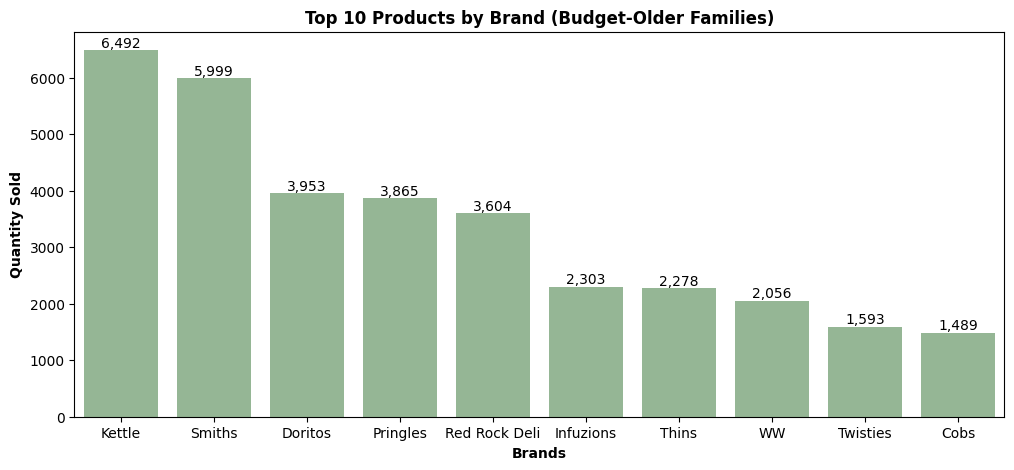

In [107]:
plt.figure(figsize=(12,5))
plt.title('Top 10 Products by Brand (Budget-Older Families)', fontweight='bold')
data = df[(df['PREMIUM_CUSTOMER'] == 'Budget') & (df['LIFESTAGE'] == 'OLDER FAMILIES')]
ax = sns.barplot(data.groupby('PROD_BRAND')['PROD_QTY'].sum().sort_values(ascending=False).head(10), color='darkseagreen')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():,.0f}', ha='center', va='bottom')
plt.xlabel('Brands', fontweight='bold')
plt.ylabel('Quantity Sold', fontweight='bold')
plt.show()

Consistent with the most purchased product brand, this group also frequently bought Kettle, Smiths, Doritos, Pringles, and Red Rock Deli.

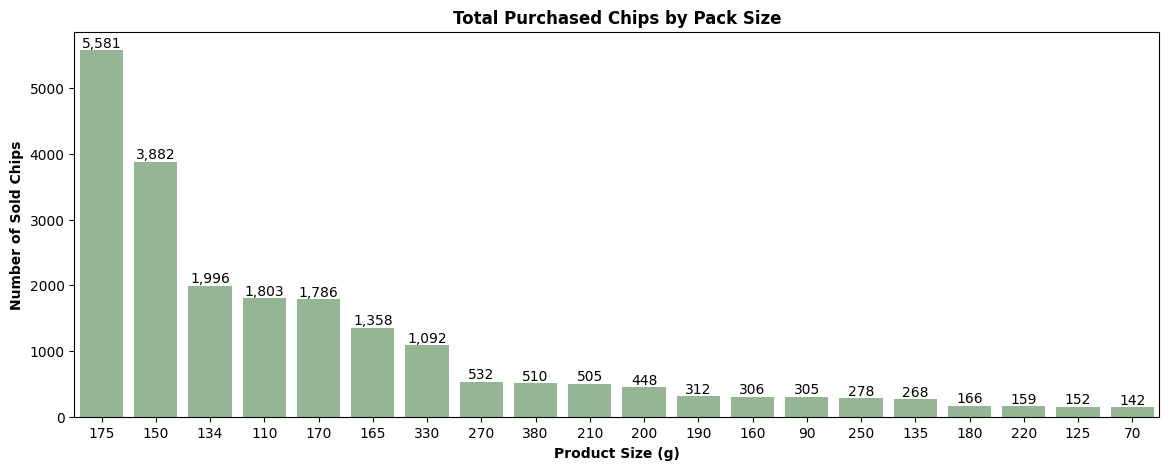

In [108]:
plt.figure(figsize=(14,5))
plt.title('Total Purchased Chips by Pack Size', fontweight='bold')
data = df[(df['PREMIUM_CUSTOMER'] == 'Budget') & (df['LIFESTAGE'] == 'OLDER FAMILIES')]
ax = sns.countplot(x=data['PROD_GR'], order=data['PROD_GR'].value_counts().index, color='darkseagreen')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():,.0f}', ha='center', va='bottom')
plt.xlabel('Product Size (g)', fontweight='bold')
plt.ylabel('Number of Sold Chips', fontweight='bold')
plt.show()

The same trend applies to pack size, with 175g chips being the most purchased.

## **Conclusion and Recommendation**

> Conclusion

- Total sales for chip transactions from June 2018 to July 2019 are **$1,792,349**.
- **Highest sales** occurred in **December**, likely due to christmas and new year celebration.
- **Store 226** generated the **highest sales**, totaling over $16,000, with 1,860 chips transactions and 3,703 bags of chips sold.
- **Kettle** is the **most frequently purchased brand**, selling over 79,000 packs, followed by Smiths, Doritos, and Pringles. Burger Rings, Woolworths, and Frech Fries are among the least purchased brands.
- The 175g pack size records the highest sales volume, exceeding 63,000 units sold.
- There are more than 70,000 customers in the dataset:
    - 28,695 being in Mainstream tier, 24,010 in Budget tier, and 18,546 in Premium tier.
    - By lifestage, the biggest segments are Retirees, Older Singles/Couples, and Young Singles/Couples, at around 14,000 customers.
    - 7,874 customers fall into Mainstream-Young Singles/Couples segment and 6,364 into Mainstream-Retirees. Older Singles/Couples have the highest number of Premium and Budget user.
- The **Budget-Older Families** segment **ranked first in both purchase volume and total sales**, generating $156,461 from 41,989 packs sold. The Mainstream-Young Singles/Couples segment followed with total sales of $145,613.
- In the **Young and Midage Singles/Couples** segment, Mainstream tier have the highest mean price per unit, surpassing both Budget and Premium groups. Additionally, while the difference in price is small, it is statistically significant. The **Mainstream** group shows a **higher willingness to pay per pack of chips**.

> Recommendation

- Maximize marketing efforts (seasonal campaigns, bundled offers, and holiday-themed promotions) and increase stock levels in November-December to capitalize on the holiday sales surge, particularly for popular brands like Kettle, Smiths, and Doritos.
- Maintain inventory, prioritize shelf space, and promotions for the top 3 or 5 brands (Kettle, Smiths, Doritos, Pringles, and Red Rock Deli or Infuzions), as they contribute the largest share of sales.
- Reassess shelf space and promotional investments for low-selling brands, or exploring rebranding strategies to boost sales.
- Promote upgrades from Budget and Mainstream tiers through personalized offers or rewards.
- Design cross-promotions aimed at Retirees and Older Singles/Couples, given their large customer base.
- Develop tailored marketing campaigns for Budget-Older Families, the top-spending segment, and Mainstream-Young Singles/Couples, the second-highest spending and largest customer group.
- Offer premium chip options targeted at the Mainstream-Young and Midage Singles/Couples segment, who demonstrate a statistically significant greater willingness to pay per pack.
- Evaluate pricing sensitivity by offering premium-priced products to Mainstream-Young and Midage Singles/Couples segment to analyze potential revenue growth.